# Load Packages

In [1]:
#!pip install lightgbm

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\csia7\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [3]:
#!pip install xgboost

In [5]:
#!pip install import-ipynb

In [2]:
import import_ipynb
import csv

import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score

from srcs.utils import load_data, print_scores, get_scores, calculate_metrics
import time
import tracemalloc
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings

warnings.filterwarnings('ignore')

## Template
```python
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Your Model Name")


naive_poisson = your_model()

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train, sample_weight=X_train["Exposure"])
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

```


In [57]:
df = load_data()
df["ClaimFreq"] = df["ClaimNb"]/df['Exposure']
df["ClaimFreq"] = df["ClaimFreq"].clip(upper = 5)

In [59]:
np.percentile(df['ClaimNb'], 99.999)

5.219879999989644

In [49]:
np.percentile(df['ClaimFreq'], 99.999)

5.0

(array([127596.,  59973.,  62371.,  41184.,  62990.,  36999.,  32115.,
         38024.,  24866., 191895.]),
 array([0.00273224, 0.10245902, 0.20218579, 0.30191257, 0.40163934,
        0.50136612, 0.6010929 , 0.70081967, 0.80054645, 0.90027322,
        1.        ]),
 <BarContainer object of 10 artists>)

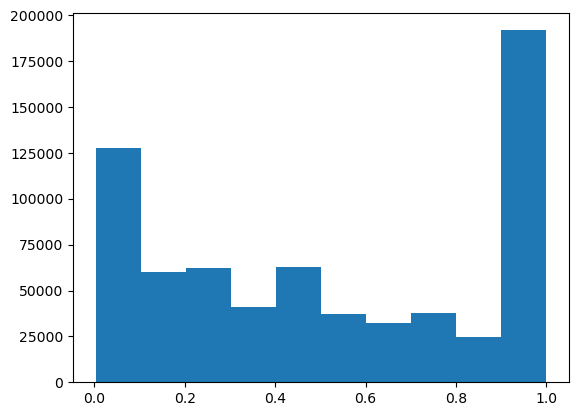

In [32]:
df['Exposure'] = df['Exposure'].clip(upper = 1)
plt.hist(df['Exposure'])

In [34]:
df['Exposure'].describe()

count   678,013.0000
mean          0.5285
std           0.3641
min           0.0027
25%           0.1800
50%           0.4900
75%           0.9900
max           1.0000
Name: Exposure, dtype: float64

(array([6.43953e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 6.00000e+00, 5.00000e+00, 6.00000e+00, 2.30000e+01,
        1.12300e+04, 8.78000e+02, 7.48000e+02, 4.24000e+02, 5.21000e+02,
        7.95000e+02, 5.71000e+02, 7.15000e+02, 6.85000e+02, 3.30000e+02,
        3.52000e+02, 3.74000e+02, 3.65000e+02, 3.35000e+02, 2.72000e+02,
        3.67000e+02, 1.71000e+02, 5.06000e+02, 1.64000e+02, 1.97000e+02,
        1.60900e+03, 2.13000e+02, 2.59000e+02, 2.65000e+02, 2.86000e+02,
        1.98000e+02, 2.49000e+02, 1.89000e+02, 3.34000e+02, 1.40000e+01,
        2.12000e+02, 1.63000e+02, 1.88000e+02, 2.40000e+01, 2.03000e+02,
        2.49000e+02, 2.20000e+01, 1.96000e+02, 1.57000e+02, 9.00000e+00,
        2.92000e+02, 9.00000e+00, 1.86000e+02, 1.30000e+01, 1.88000e+02,
        1.70000e+01, 1.89000e+02, 1.40000e+01, 2.33

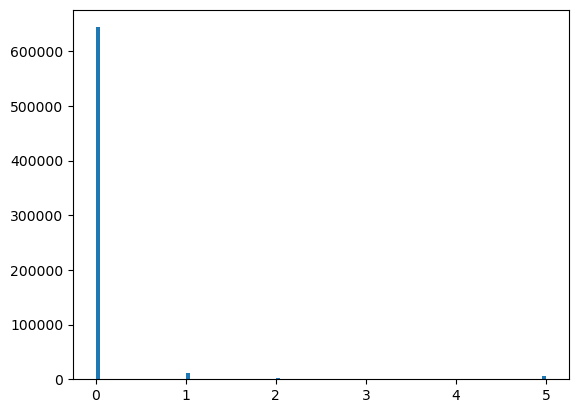

In [36]:
plt.hist(df["ClaimFreq"], bins = 100)

# Model Evaluation

In [50]:
# use to store the scores of each model
results = []

## Intercept Only Model (ClaimFreq)

In [51]:
# load the data
df = load_data()

# replace target as Claim Frequency and drop and Exposure
df["ClaimFreq"] = df["ClaimNb"]/df['Exposure']
df["ClaimFreq"] = df["ClaimFreq"].clip(upper = 5)
df.drop(columns = ['ClaimNb'], inplace=True)

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimFreq'])
y = df['ClaimFreq']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Intercept Only Model (ClaimFreq)")
# Noting to specify, as it is an intercept only model
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    # Noting to specify, as it is an intercept only model,no need to train
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = y_train.mean() * np.mean(X_train["Exposure"]) * X_train["Exposure"]
    y_pred_test = y_train.mean() * np.mean(X_test["Exposure"]) * X_test["Exposure"]
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train*X_train['Exposure'], y_pred_train, y_test*X_test['Exposure'], y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Intercept Only Model (ClaimFreq),test,MAE,0.0492,0.0006
3,Intercept Only Model (ClaimFreq),test,MaxError,3.9489,0.8848
5,Intercept Only Model (ClaimFreq),test,MeanPoissonDeviance,0.2915,0.0035
7,Intercept Only Model (ClaimFreq),test,PDE,0.0102,0.0002
11,Intercept Only Model (ClaimFreq),test,memory,0.0051,0.0000
9,Intercept Only Model (ClaimFreq),test,time,0.0073,0.0073
0,Intercept Only Model (ClaimFreq),train,MAE,0.0492,0.0002
2,Intercept Only Model (ClaimFreq),train,MaxError,4.9405,0.0003
4,Intercept Only Model (ClaimFreq),train,MeanPoissonDeviance,0.2915,0.0007
6,Intercept Only Model (ClaimFreq),train,PDE,0.0102,0.0000


## Naive Poisson Regression -- Baseline (ClaimFreq)

In [52]:
# load the data
df = load_data()

# replace target as Claim Frequency and drop and Exposure
df["ClaimFreq"] = df["ClaimNb"]/df['Exposure']
df["ClaimFreq"] = df["ClaimFreq"].clip(upper = 5)
df.drop(columns = ['ClaimNb'], inplace=True)

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimFreq'])
y = df['ClaimFreq']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Naive Poisson Regression--Baseline (ClaimFreq)")
from sklearn.linear_model import PoissonRegressor

naive_poisson = PoissonRegressor()
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train)
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)*X_train['Exposure']
    y_pred_test = model.predict(X_test)*X_test['Exposure']
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train*X_train['Exposure'], y_pred_train, y_test*X_test['Exposure'], y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Naive Poisson Regression--Baseline (ClaimFreq),test,MAE,0.0494,0.0006
3,Naive Poisson Regression--Baseline (ClaimFreq),test,MaxError,3.9033,0.8762
5,Naive Poisson Regression--Baseline (ClaimFreq),test,MeanPoissonDeviance,0.2860,0.0024
7,Naive Poisson Regression--Baseline (ClaimFreq),test,PDE,0.0033,0.0005
11,Naive Poisson Regression--Baseline (ClaimFreq),test,memory,0.2021,0.0000
9,Naive Poisson Regression--Baseline (ClaimFreq),test,time,0.1145,0.0061
0,Naive Poisson Regression--Baseline (ClaimFreq),train,MAE,0.0494,0.0002
2,Naive Poisson Regression--Baseline (ClaimFreq),train,MaxError,4.8873,0.0005
4,Naive Poisson Regression--Baseline (ClaimFreq),train,MeanPoissonDeviance,0.2860,0.0007
6,Naive Poisson Regression--Baseline (ClaimFreq),train,PDE,0.0033,0.0001


# XGBoost (ClaimFreq)

In [53]:
# load the data
df = load_data()

df["ClaimFreq"] = df["ClaimNb"]/df['Exposure']
df["ClaimFreq"] = df["ClaimFreq"].clip(upper = 5)
df.drop(columns = ['ClaimNb'], inplace=True)

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""

df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6


# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimFreq'])
y = df['ClaimFreq']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""

scores = get_scores(model_name="xgboost Poisson Regression (ClaimFreq)")
from xgboost import XGBRegressor

xgboost_poisson_model = XGBRegressor(objective="count:poisson")



kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = xgboost_poisson_model.fit(X_train, y_train)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)*X_train['Exposure']
    y_pred_test = model.predict(X_test)*X_test['Exposure']

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train*X_train['Exposure'], y_pred_train, y_test*X_test['Exposure'], y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,xgboost Poisson Regression (ClaimFreq),test,MAE,0.0471,0.0005
3,xgboost Poisson Regression (ClaimFreq),test,MaxError,3.9431,0.8903
5,xgboost Poisson Regression (ClaimFreq),test,MeanPoissonDeviance,0.2600,0.0022
7,xgboost Poisson Regression (ClaimFreq),test,PDE,0.0465,0.0016
11,xgboost Poisson Regression (ClaimFreq),test,memory,0.2405,0.0000
9,xgboost Poisson Regression (ClaimFreq),test,time,0.3676,0.0097
0,xgboost Poisson Regression (ClaimFreq),train,MAE,0.0463,0.0001
2,xgboost Poisson Regression (ClaimFreq),train,MaxError,4.9324,0.0059
4,xgboost Poisson Regression (ClaimFreq),train,MeanPoissonDeviance,0.2527,0.0007
6,xgboost Poisson Regression (ClaimFreq),train,PDE,0.0619,0.0007


## Naive Poisson Regression -- Baseline (ClaimFreq + LDS)

In [54]:
# load the data
df = load_data()

# replace target as Claim Frequency and drop and Exposure
df["ClaimFreq"] = df["ClaimNb"]/df['Exposure']
df["ClaimFreq"] = df["ClaimFreq"].clip(upper = 5)
df.drop(columns = ['ClaimNb'], inplace=True)

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimFreq'])
y = df['ClaimFreq']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here

"""

from collections import Counter
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d
from loss import weighted_mse_loss

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

# preds, labels: [Ns,], "Ns" is the number of total samples
preds = X
labels = y

def get_bin_idx(label):
    if (label == 0):
        return 0
    elif (label <= 2):
        return 1
    elif (label <= 5):
        return 2
    elif (label <= 10):
        return 3
    elif (label <= 20):
        return 4
    else:
        return 5

# assign each label to its corresponding bin (start from 0)
# with your defined get_bin_idx(), return bin_index_per_label: [Ns,] 
bin_index_per_label = [get_bin_idx(label) for label in labels]

# calculate empirical (original) label distribution: [Nb,]
# "Nb" is the number of bins
Nb = max(bin_index_per_label) + 1
num_samples_of_bins = dict(Counter(bin_index_per_label))
emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

# lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
lds_kernel_window = get_lds_kernel_window(kernel='gaussian', ks=5, sigma=2)
# calculate effective label distribution: [Nb,]
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')

# Use re-weighting based on effective label distribution, sample-wise weights: [Ns,]
eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
weights = [np.float32(1 / x) for x in eff_num_per_label]
weights = pd.DataFrame({'weights': weights})

scores = get_scores(model_name="Naive Poisson Regression--Baseline (ClaimFreq + LDS)")
from sklearn.linear_model import PoissonRegressor

naive_poisson = PoissonRegressor()
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weights_train, weights_test = weights.iloc[train_index], weights.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train, sample_weight = weights_train['weights'])
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)*X_train['Exposure']
    y_pred_test = model.predict(X_test)*X_test['Exposure']
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train*X_train['Exposure'], y_pred_train, y_test*X_test['Exposure'], y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Naive Poisson Regression--Baseline (ClaimFreq ...,test,MAE,0.0498,0.0005
3,Naive Poisson Regression--Baseline (ClaimFreq ...,test,MaxError,3.8923,0.8741
5,Naive Poisson Regression--Baseline (ClaimFreq ...,test,MeanPoissonDeviance,0.2891,0.0022
7,Naive Poisson Regression--Baseline (ClaimFreq ...,test,PDE,-0.0006,0.0007
11,Naive Poisson Regression--Baseline (ClaimFreq ...,test,memory,0.2021,0.0000
9,Naive Poisson Regression--Baseline (ClaimFreq ...,test,time,0.1178,0.0057
0,Naive Poisson Regression--Baseline (ClaimFreq ...,train,MAE,0.0498,0.0002
2,Naive Poisson Regression--Baseline (ClaimFreq ...,train,MaxError,4.8746,0.0006
4,Naive Poisson Regression--Baseline (ClaimFreq ...,train,MeanPoissonDeviance,0.2891,0.0007
6,Naive Poisson Regression--Baseline (ClaimFreq ...,train,PDE,-0.0006,0.0001


# Summary (ClaimFreq)

In [55]:
df_results = pd.DataFrame()
for result in results:
    df_results = pd.concat([df_results, pd.DataFrame(result)])

df_results.groupby("model").mean().sort_values(by="test_MAE")

,train_MAE,test_MAE,train_MaxError,test_MaxError,train_MeanPoissonDeviance,test_MeanPoissonDeviance,train_PDE,test_PDE,train_time,test_time,train_memory,test_memory
model,,,,,,,,,,,,
xgboost Poisson Regression (ClaimFreq),0.0463,0.0471,4.9324,3.9431,0.2527,0.2600,0.0619,0.0465,2.4042,0.3676,0.2425,0.2405
Intercept Only Model (ClaimFreq),0.0492,0.0492,4.9405,3.9489,0.2915,0.2915,0.0102,0.0102,0.0000,0.0073,0.0000,0.0051
Naive Poisson Regression--Baseline (ClaimFreq),0.0494,0.0494,4.8873,3.9033,0.2860,0.2860,0.0033,0.0033,0.1133,0.1145,0.2102,0.2021
Naive Poisson Regression--Baseline (ClaimFreq + LDS),0.0498,0.0498,4.8746,3.8923,0.2891,0.2891,-0.0006,-0.0006,0.1138,0.1178,0.2102,0.2021


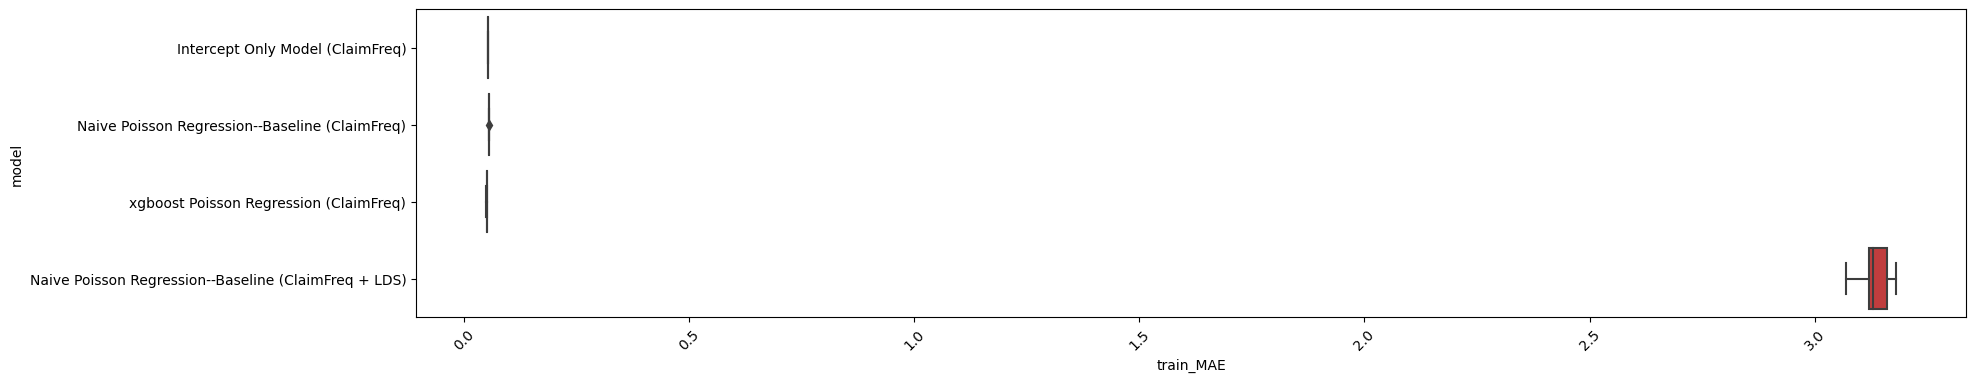

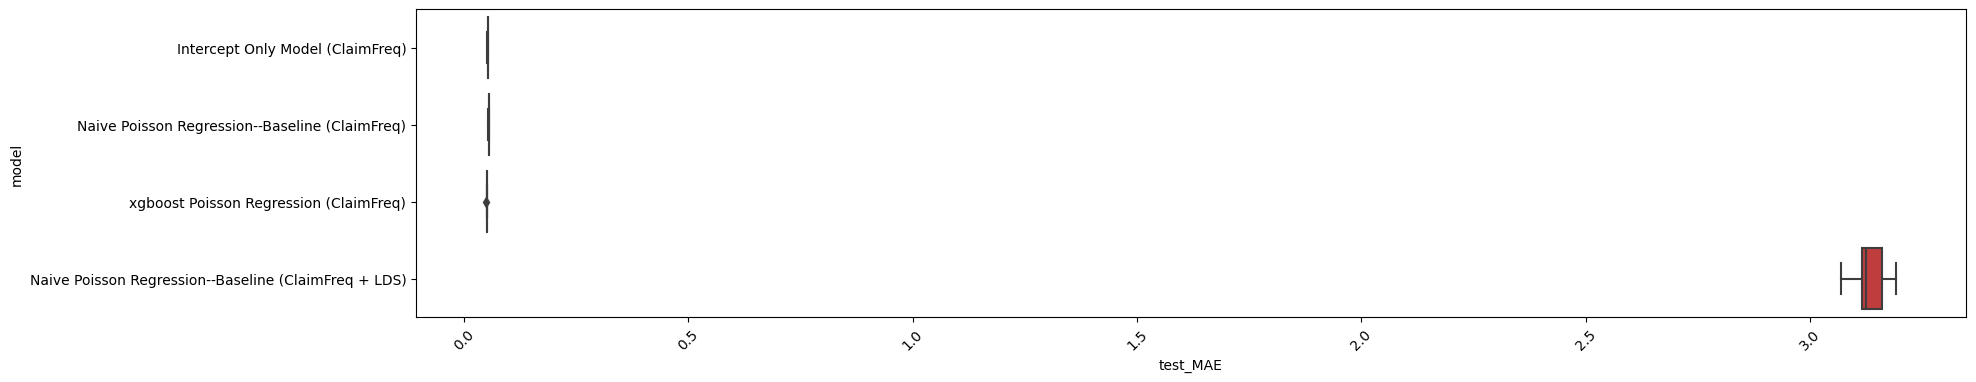

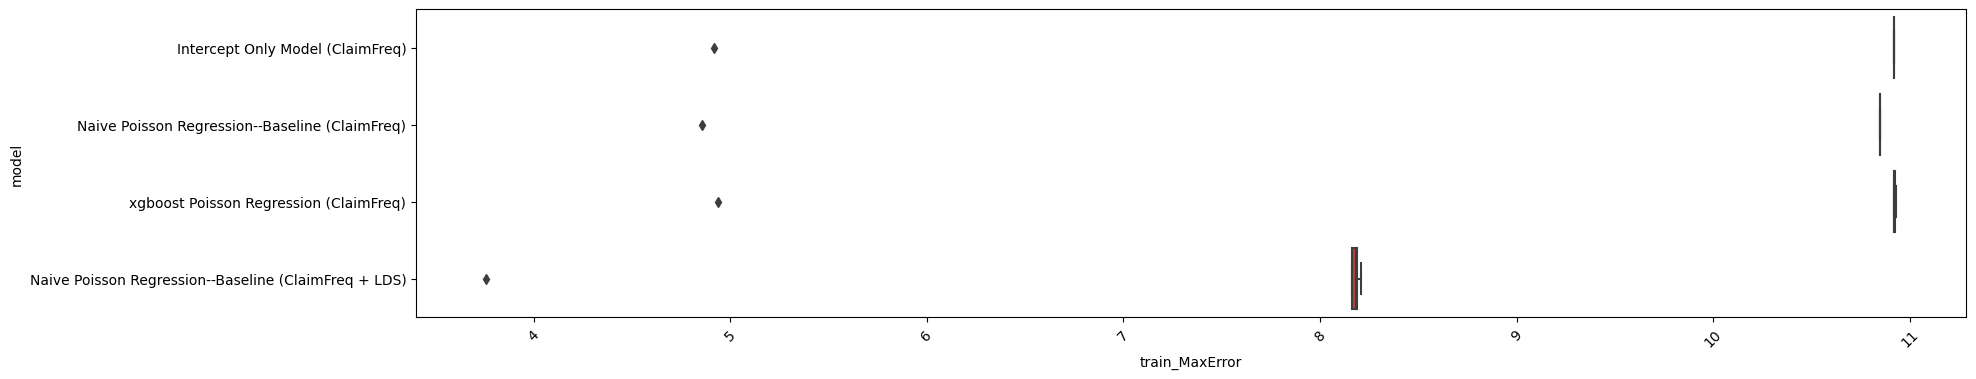

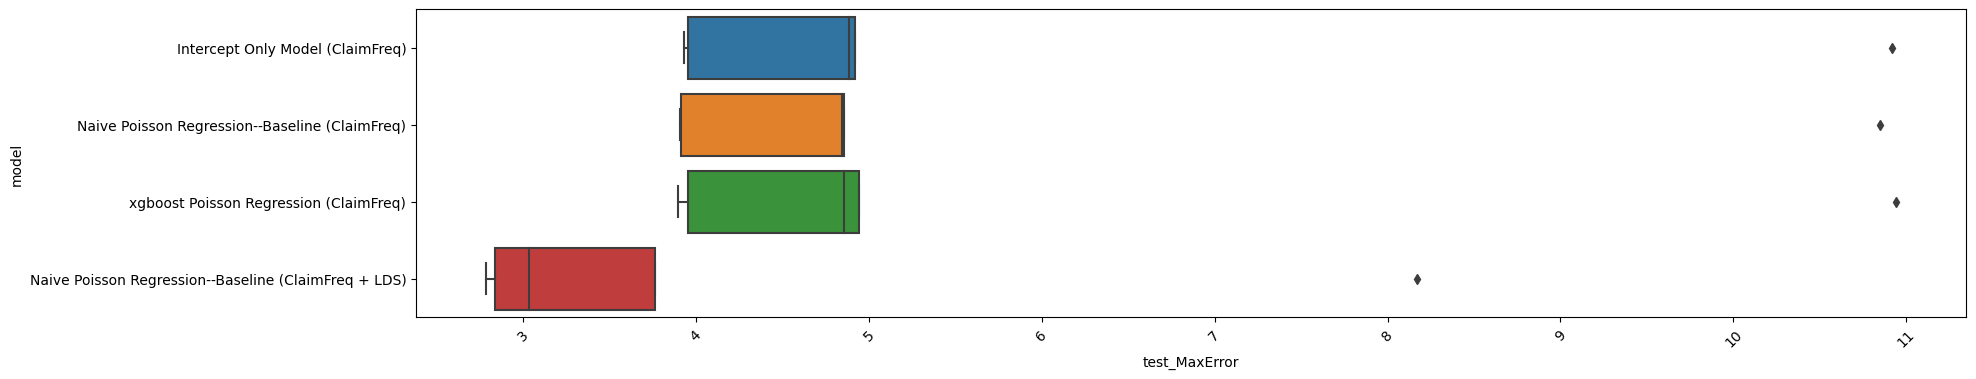

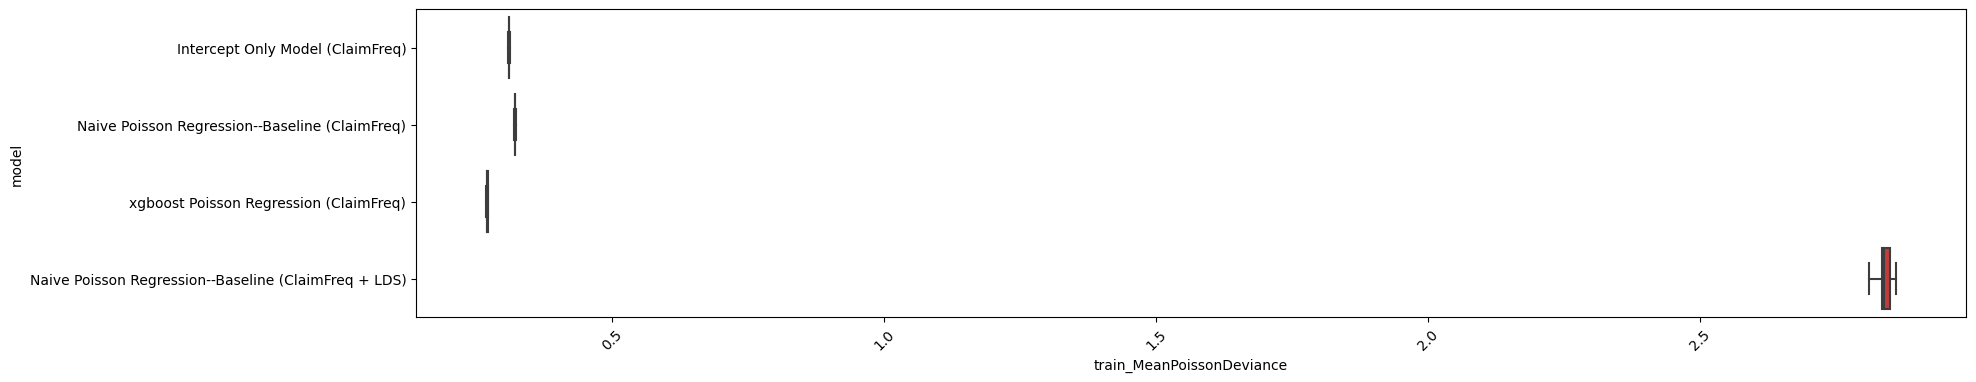

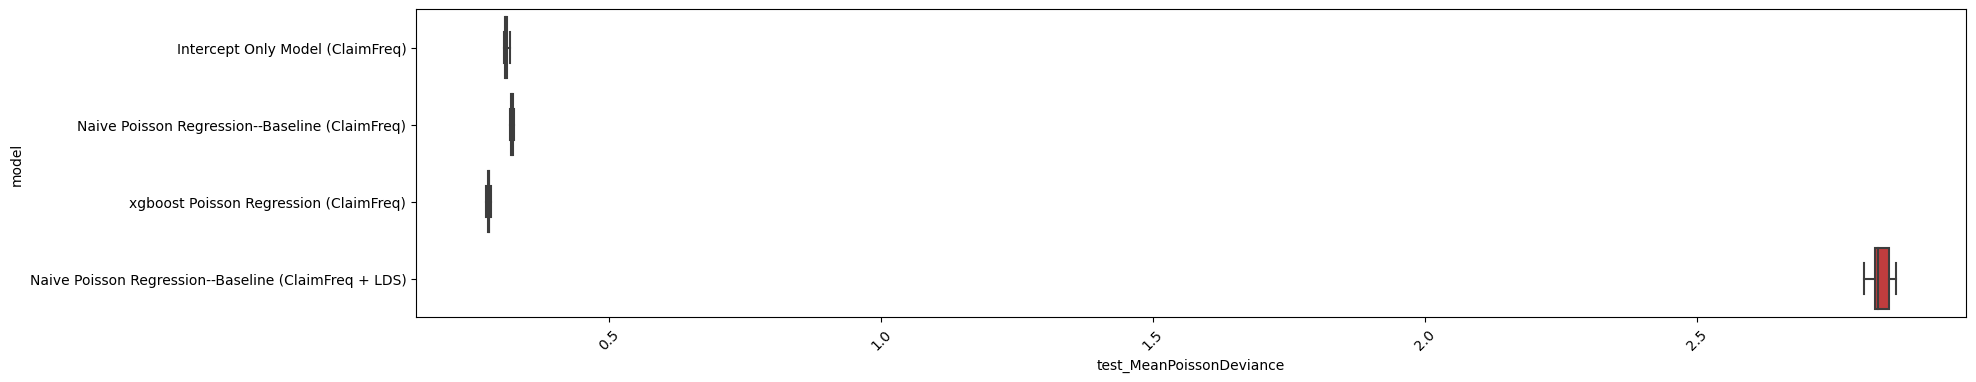

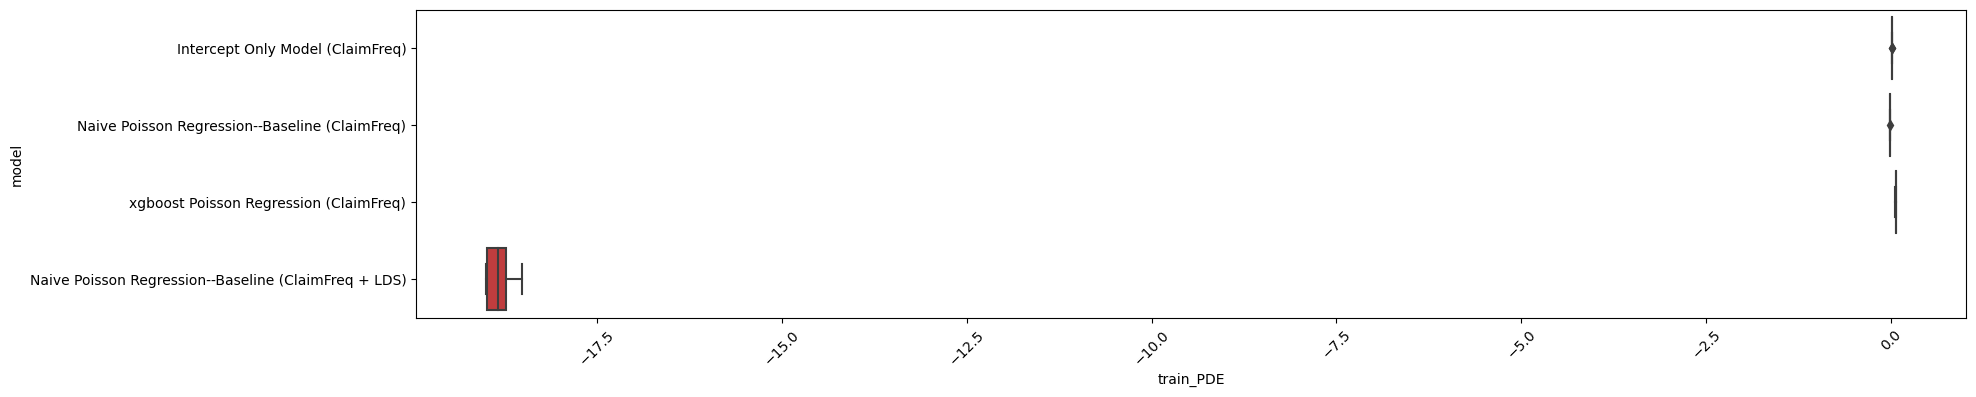

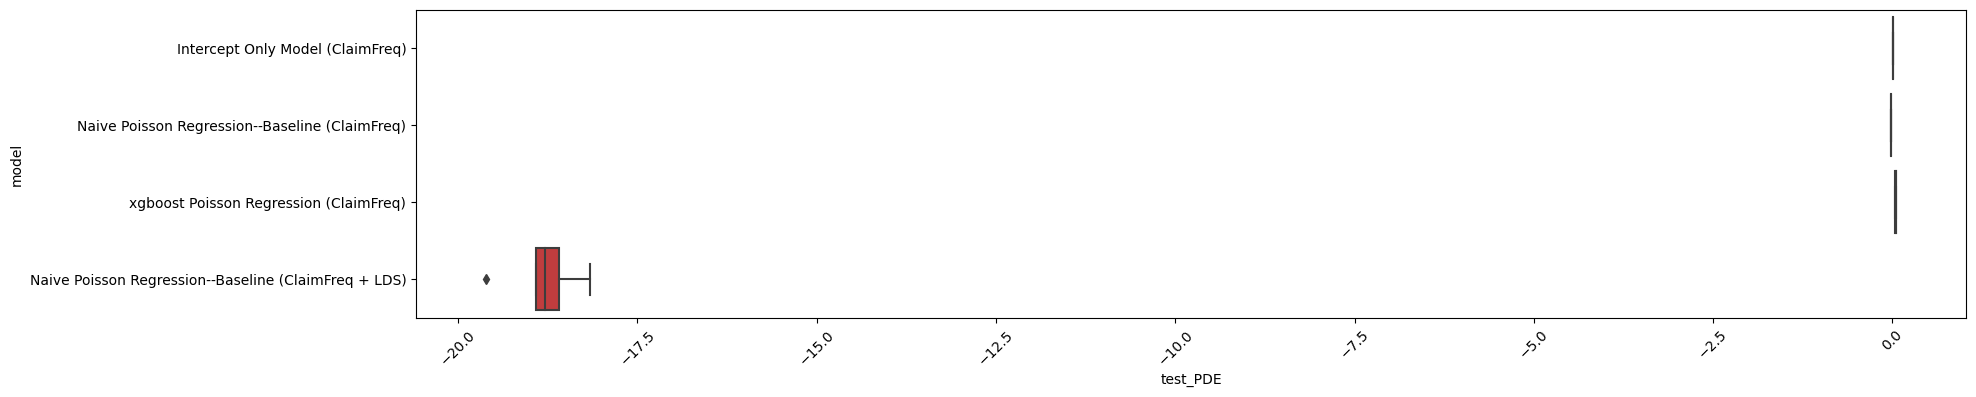

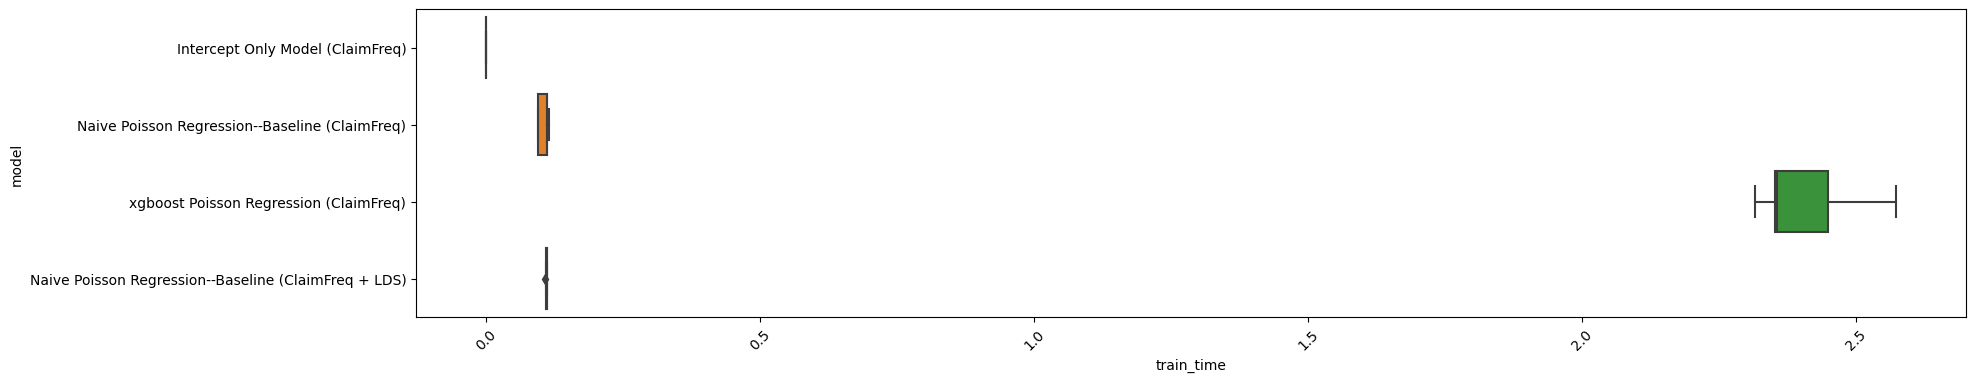

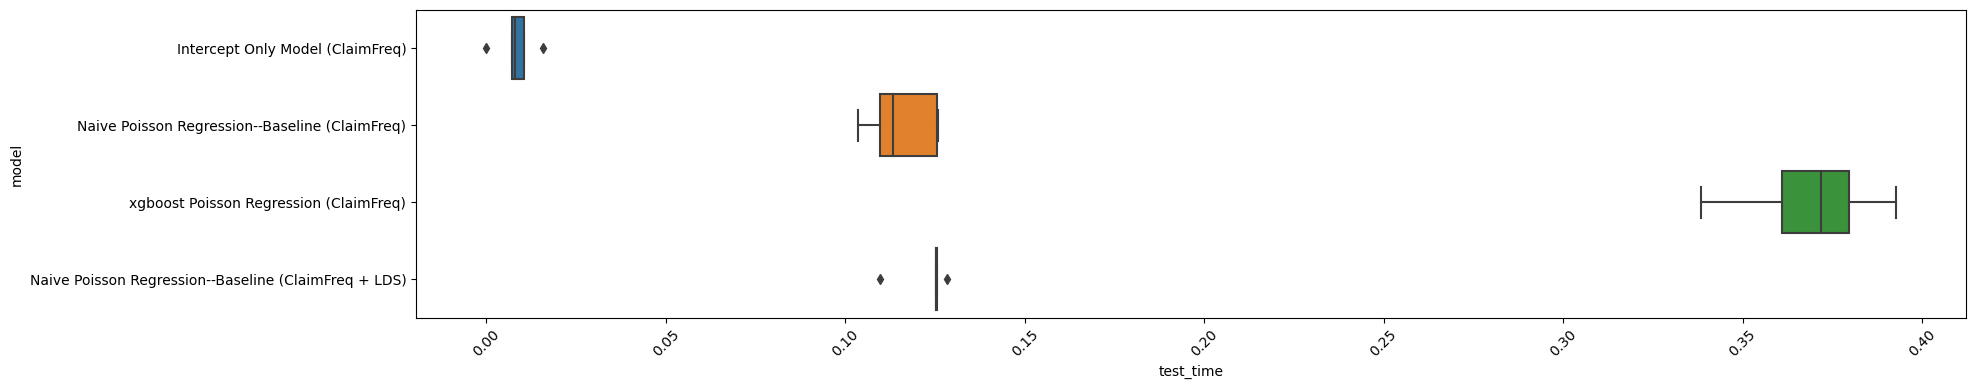

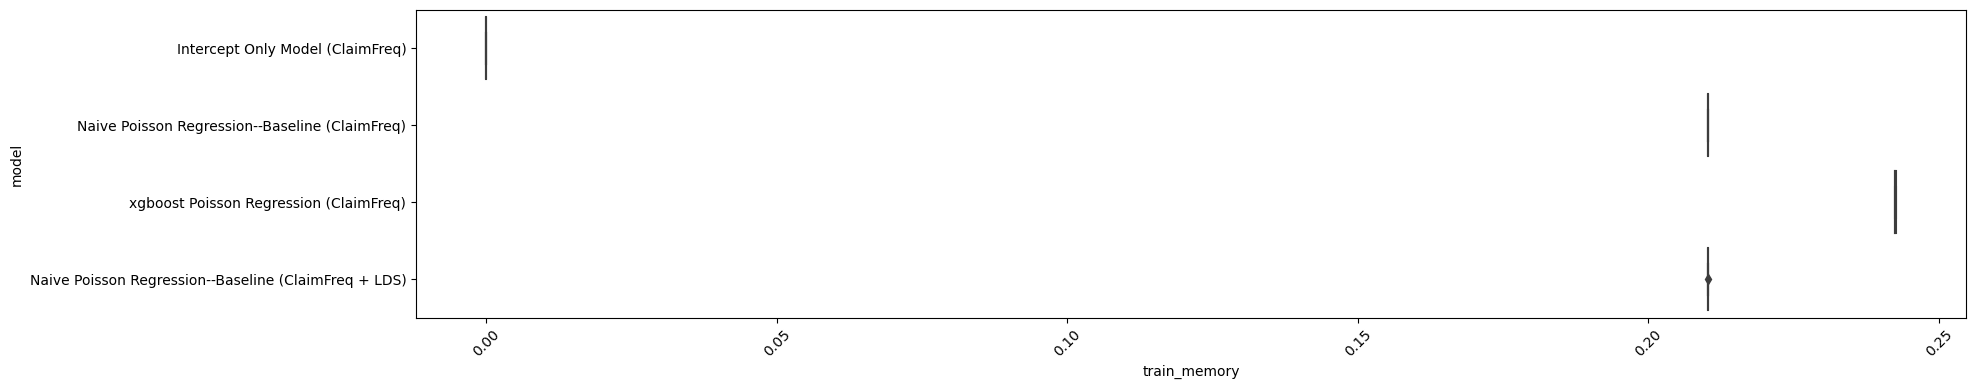

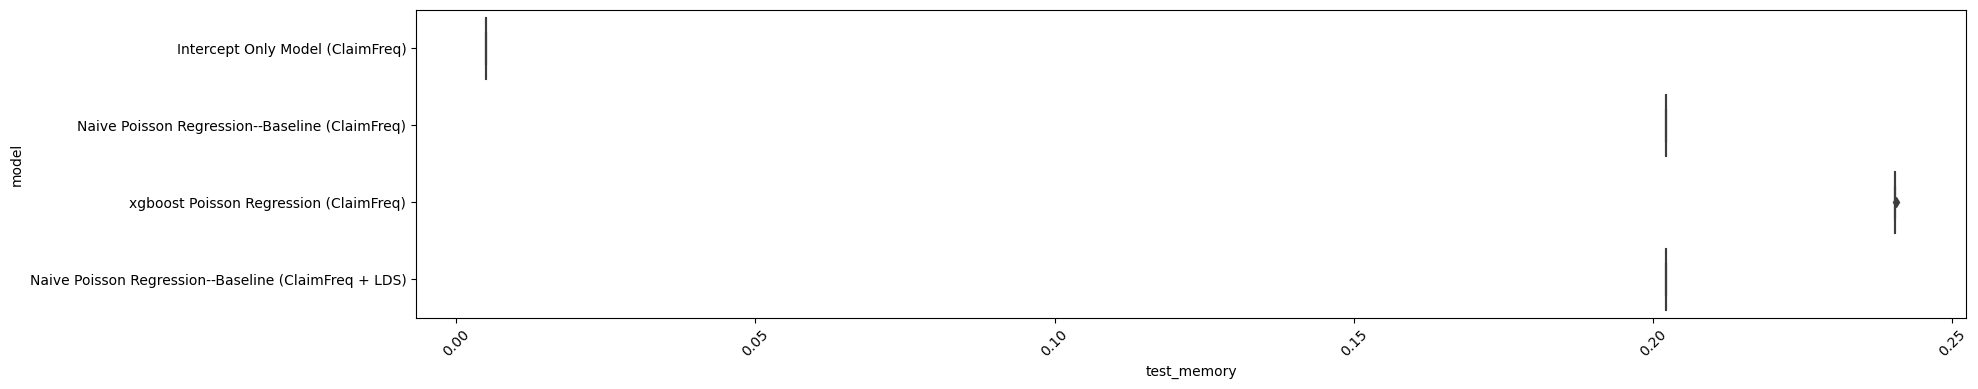

In [28]:
for metric in results[0].keys():
    if metric != "model":
        plt.figure(figsize=(20, len(results)))
        sns.boxplot(data=df_results, y="model", x=metric)
        plt.xticks(rotation=45)
        plt.show()

# Reset Model Evaluation

In [44]:
# use to store the scores of each model
results = []

## Naive Poisson Regression -- With Feature Engineering + Hyperparameter Tuning

In [50]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3



# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Naive Poisson Regression--With Feature Engineering + Hyperparameter Tuning")
from sklearn.linear_model import PoissonRegressor

# using random search to fine-tune the model
from sklearn.model_selection import RandomizedSearchCV

search_space = {
    "alpha": np.logspace(-5, 5, 100),
    "solver": ["lbfgs", "newton-cholesky"]
}

rscv = RandomizedSearchCV(PoissonRegressor(),
                          search_space,
                          n_iter=10,
                          cv=5,
                          scoring="neg_mean_absolute_error",
                          return_train_score=True,
                          n_jobs=-1,
                          random_state=42,
                          verbose=2).fit(X, y, sample_weight=X["Exposure"])
print(rscv.best_params_)
naive_poisson2 = PoissonRegressor(**rscv.best_params_)
# End of model specification


kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson2.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'solver': 'newton-cholesky', 'alpha': 5.0941380148163754e-05}


0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Naive Poisson Regression--With Feature Enginee...,test,MAE,0.0556,0.0007
3,Naive Poisson Regression--With Feature Enginee...,test,MaxError,4.2409,0.5359
5,Naive Poisson Regression--With Feature Enginee...,test,MeanPoissonDeviance,0.3023,0.0033
7,Naive Poisson Regression--With Feature Enginee...,test,PDE,0.0188,0.0015
11,Naive Poisson Regression--With Feature Enginee...,test,memory,0.2223,0.0000
9,Naive Poisson Regression--With Feature Enginee...,test,time,0.1936,0.0201
0,Naive Poisson Regression--With Feature Enginee...,train,MAE,0.0555,0.0002
2,Naive Poisson Regression--With Feature Enginee...,train,MaxError,5.0904,0.5968
4,Naive Poisson Regression--With Feature Enginee...,train,MeanPoissonDeviance,0.3021,0.0009
6,Naive Poisson Regression--With Feature Enginee...,train,PDE,0.0192,0.0001


## Naive Poisson Regression -- With Feature Engineering + Hyperparameter Tuning + LDS

In [51]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3



# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""

from collections import Counter
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d
from loss import weighted_mse_loss

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

# preds, labels: [Ns,], "Ns" is the number of total samples
preds = X
labels = y

def get_bin_idx(label):
    return round(label)

# assign each label to its corresponding bin (start from 0)
# with your defined get_bin_idx(), return bin_index_per_label: [Ns,] 
bin_index_per_label = [get_bin_idx(label) for label in labels]

# calculate empirical (original) label distribution: [Nb,]
# "Nb" is the number of bins
Nb = max(bin_index_per_label) + 1
num_samples_of_bins = dict(Counter(bin_index_per_label))
emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

# lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
lds_kernel_window = get_lds_kernel_window(kernel='gaussian', ks=5, sigma=2)
# calculate effective label distribution: [Nb,]
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')

# Use re-weighting based on effective label distribution, sample-wise weights: [Ns,]
eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
weights = [np.float32(1 / x) for x in eff_num_per_label]
weights = pd.DataFrame({'weights': weights})
d4
sample_weight_calc = [a*b for a,b in zip(weights['weights'],X["Exposure"])]  

scores = get_scores(model_name="Naive Poisson Regression--With Feature Engineering + Hyperparameter Tuning + LDS")
from sklearn.linear_model import PoissonRegressor

# using random search to fine-tune the model
from sklearn.model_selection import RandomizedSearchCV

search_space = {
    "alpha": np.logspace(-5, 5, 100),
    "solver": ["lbfgs", "newton-cholesky"]
}

rscv = RandomizedSearchCV(PoissonRegressor(),
                          search_space,
                          n_iter=10,
                          cv=5,
                          scoring="neg_mean_absolute_error",
                          return_train_score=True,
                          n_jobs=-1,
                          random_state=42,
                          verbose=2).fit(X, y, sample_weight=sample_weight_calc)
print(rscv.best_params_)
naive_poisson2 = PoissonRegressor(**rscv.best_params_)
# End of model specification



kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weights_train, weights_test = weights.iloc[train_index], weights.iloc[test_index]

    sample_weight_calc = [a*b for a,b in zip(weights_train['weights'],X_train["Exposure"])]  

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson2.fit(X_train, y_train, sample_weight=sample_weight_calc)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'solver': 'newton-cholesky', 'alpha': 5.0941380148163754e-05}


0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Naive Poisson Regression--With Feature Enginee...,test,MAE,0.0632,0.0015
3,Naive Poisson Regression--With Feature Enginee...,test,MaxError,3.9138,0.0279
5,Naive Poisson Regression--With Feature Enginee...,test,MeanPoissonDeviance,0.3536,0.0087
7,Naive Poisson Regression--With Feature Enginee...,test,PDE,-0.0692,0.0195
11,Naive Poisson Regression--With Feature Enginee...,test,memory,0.2223,0.0000
9,Naive Poisson Regression--With Feature Enginee...,test,time,0.2148,0.0154
0,Naive Poisson Regression--With Feature Enginee...,train,MAE,0.0632,0.0017
2,Naive Poisson Regression--With Feature Enginee...,train,MaxError,4.0524,0.2910
4,Naive Poisson Regression--With Feature Enginee...,train,MeanPoissonDeviance,0.3532,0.0091
6,Naive Poisson Regression--With Feature Enginee...,train,PDE,-0.0690,0.0179


## Naive Poisson + LDS

In [52]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""

from collections import Counter
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d
from loss import weighted_mse_loss

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

# preds, labels: [Ns,], "Ns" is the number of total samples
preds = X
labels = y

def get_bin_idx(label):
    return int(label)

# assign each label to its corresponding bin (start from 0)
# with your defined get_bin_idx(), return bin_index_per_label: [Ns,] 
bin_index_per_label = [get_bin_idx(label) for label in labels]

# calculate empirical (original) label distribution: [Nb,]
# "Nb" is the number of bins
Nb = max(bin_index_per_label) + 1
num_samples_of_bins = dict(Counter(bin_index_per_label))
emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

# lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
lds_kernel_window = get_lds_kernel_window(kernel='gaussian', ks=5, sigma=2)
# calculate effective label distribution: [Nb,]
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')

# Use re-weighting based on effective label distribution, sample-wise weights: [Ns,]
eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
weights = [np.float32(1 / x) for x in eff_num_per_label]

weights = pd.DataFrame({'weights': weights})

scores = get_scores(model_name="Naive Poisson Regression--Baseline + LDS")
from sklearn.linear_model import PoissonRegressor

naive_poisson = PoissonRegressor()
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weights_train, weights_test = weights.iloc[train_index], weights.iloc[test_index]

    sample_weight_calc = [a*b for a,b in zip(weights_train['weights'],X_train["Exposure"])]    
    
    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train, sample_weight=sample_weight_calc)
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Naive Poisson Regression--Baseline + LDS,test,MAE,0.0595,0.0008
3,Naive Poisson Regression--Baseline + LDS,test,MaxError,3.8933,0.0046
5,Naive Poisson Regression--Baseline + LDS,test,MeanPoissonDeviance,0.3534,0.0049
7,Naive Poisson Regression--Baseline + LDS,test,PDE,0.0000,0.0000
11,Naive Poisson Regression--Baseline + LDS,test,memory,0.2021,0.0000
9,Naive Poisson Regression--Baseline + LDS,test,time,0.1496,0.0291
0,Naive Poisson Regression--Baseline + LDS,train,MAE,0.0595,0.0005
2,Naive Poisson Regression--Baseline + LDS,train,MaxError,3.8933,0.0046
4,Naive Poisson Regression--Baseline + LDS,train,MeanPoissonDeviance,0.3534,0.0045
6,Naive Poisson Regression--Baseline + LDS,train,PDE,0.0000,0.0000


## XGBoost Poisson Regression + LDS

In [53]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""

df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6


# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""

from collections import Counter
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d
from loss import weighted_mse_loss

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

# preds, labels: [Ns,], "Ns" is the number of total samples
preds = X
labels = y

def get_bin_idx(label):
    return int(label)

# assign each label to its corresponding bin (start from 0)
# with your defined get_bin_idx(), return bin_index_per_label: [Ns,] 
bin_index_per_label = [get_bin_idx(label) for label in labels]

# calculate empirical (original) label distribution: [Nb,]
# "Nb" is the number of bins
Nb = max(bin_index_per_label) + 1
num_samples_of_bins = dict(Counter(bin_index_per_label))
emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

# lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
lds_kernel_window = get_lds_kernel_window(kernel='gaussian', ks=5, sigma=2)
# calculate effective label distribution: [Nb,]
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')

# Use re-weighting based on effective label distribution, sample-wise weights: [Ns,]
eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
weights = [np.float32(1 / x) for x in eff_num_per_label]

weights = pd.DataFrame({'weights': weights})

scores = get_scores(model_name="xgboost Poisson Regression + LDS")
from xgboost import XGBRegressor

xgboost_poisson_model = XGBRegressor(objective="count:poisson")



kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    weights_train, weights_test = weights.iloc[train_index], weights.iloc[test_index]

    sample_weight_calc = [a*b for a,b in zip(weights_train['weights'],X_train["Exposure"])]    

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = xgboost_poisson_model.fit(X_train, y_train, sample_weight=sample_weight_calc)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,xgboost Poisson Regression + LDS,test,MAE,0.4030,0.0015
3,xgboost Poisson Regression + LDS,test,MaxError,3.3583,0.0015
5,xgboost Poisson Regression + LDS,test,MeanPoissonDeviance,1.2326,0.0025
7,xgboost Poisson Regression + LDS,test,PDE,0.0000,0.0000
11,xgboost Poisson Regression + LDS,test,memory,0.2405,0.0000
9,xgboost Poisson Regression + LDS,test,time,0.2532,0.0100
0,xgboost Poisson Regression + LDS,train,MAE,0.4030,0.0018
2,xgboost Poisson Regression + LDS,train,MaxError,3.3583,0.0015
4,xgboost Poisson Regression + LDS,train,MeanPoissonDeviance,1.2326,0.0027
6,xgboost Poisson Regression + LDS,train,PDE,-0.0000,0.0000


# Summary

In [54]:
df_results = pd.DataFrame()
for result in results:
    df_results = pd.concat([df_results, pd.DataFrame(result)])

df_results.groupby("model").mean().sort_values(by="test_MAE")

,train_MAE,test_MAE,train_MaxError,test_MaxError,train_MeanPoissonDeviance,test_MeanPoissonDeviance,train_PDE,test_PDE,train_time,test_time,train_memory,test_memory
model,,,,,,,,,,,,
Naive Poisson Regression--With Feature Engineering + Hyperparameter Tuning,0.0581,0.0581,4.7444,4.1319,0.3191,0.3194,-0.0102,-0.0105,1.2752,0.1956,0.4446,0.2223
Naive Poisson Regression--Baseline + LDS,0.0595,0.0595,3.8933,3.8933,0.3534,0.3534,0.0000,0.0000,0.1892,0.1517,0.2102,0.2021
Naive Poisson Regression--With Feature Engineering + Hyperparameter Tuning + LDS,0.0632,0.0632,4.0524,3.9138,0.3532,0.3536,-0.0690,-0.0692,1.2293,0.2148,0.4446,0.2223
xgboost Poisson Regression + LDS,0.4030,0.4030,3.3583,3.3583,1.2326,1.2326,-0.0000,0.0000,2.0296,0.2535,0.2425,0.2405


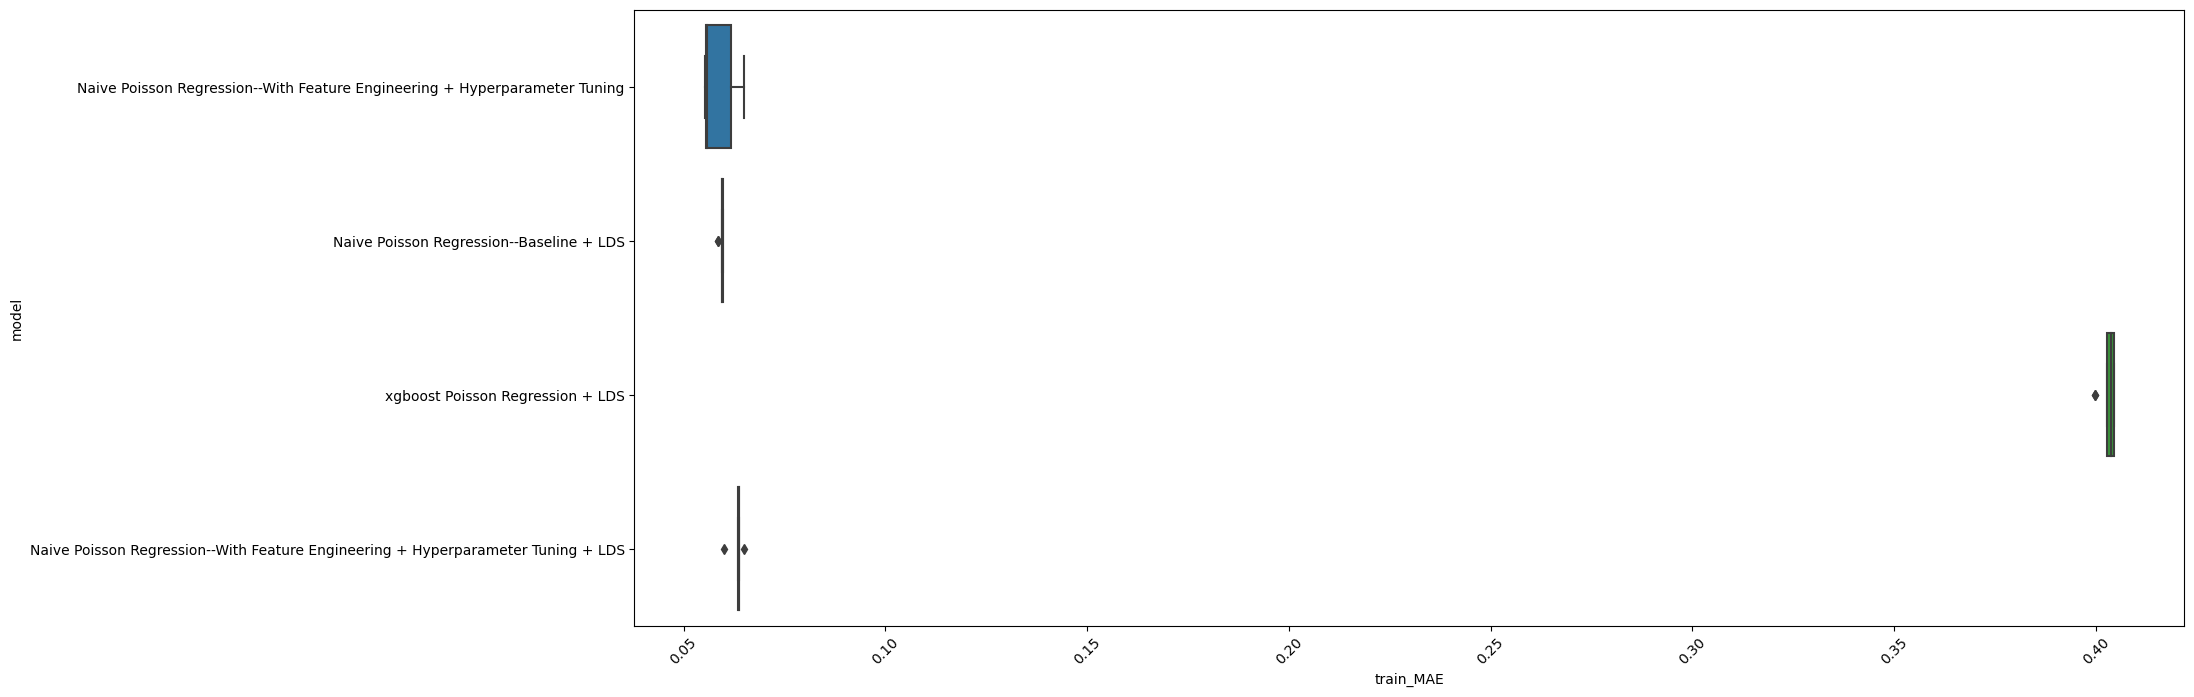

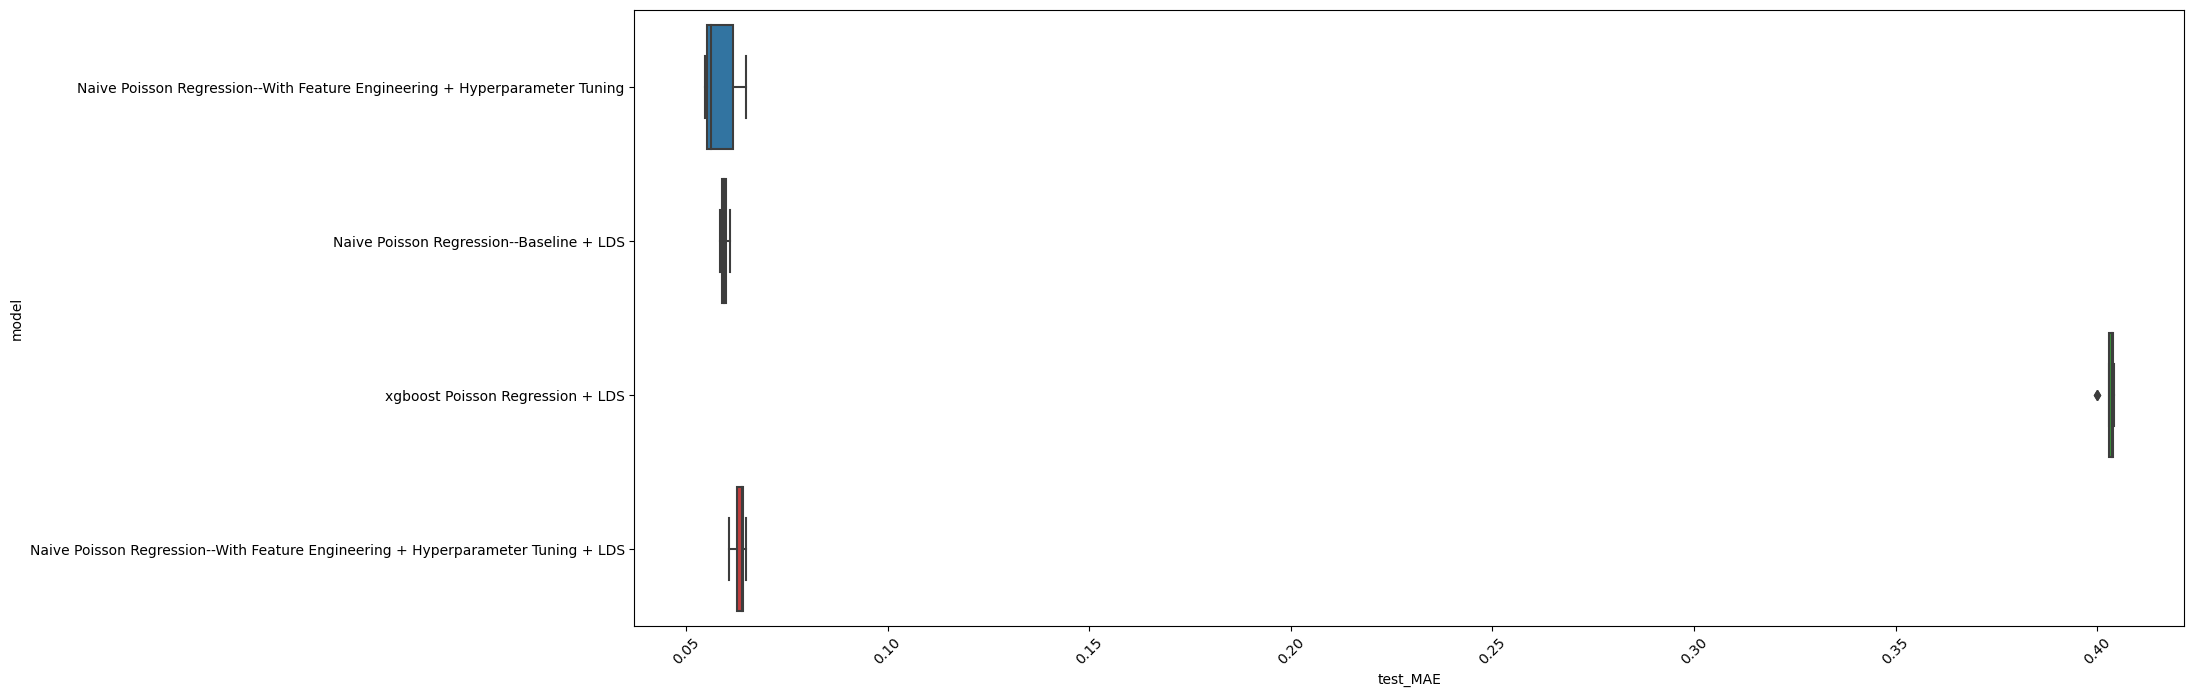

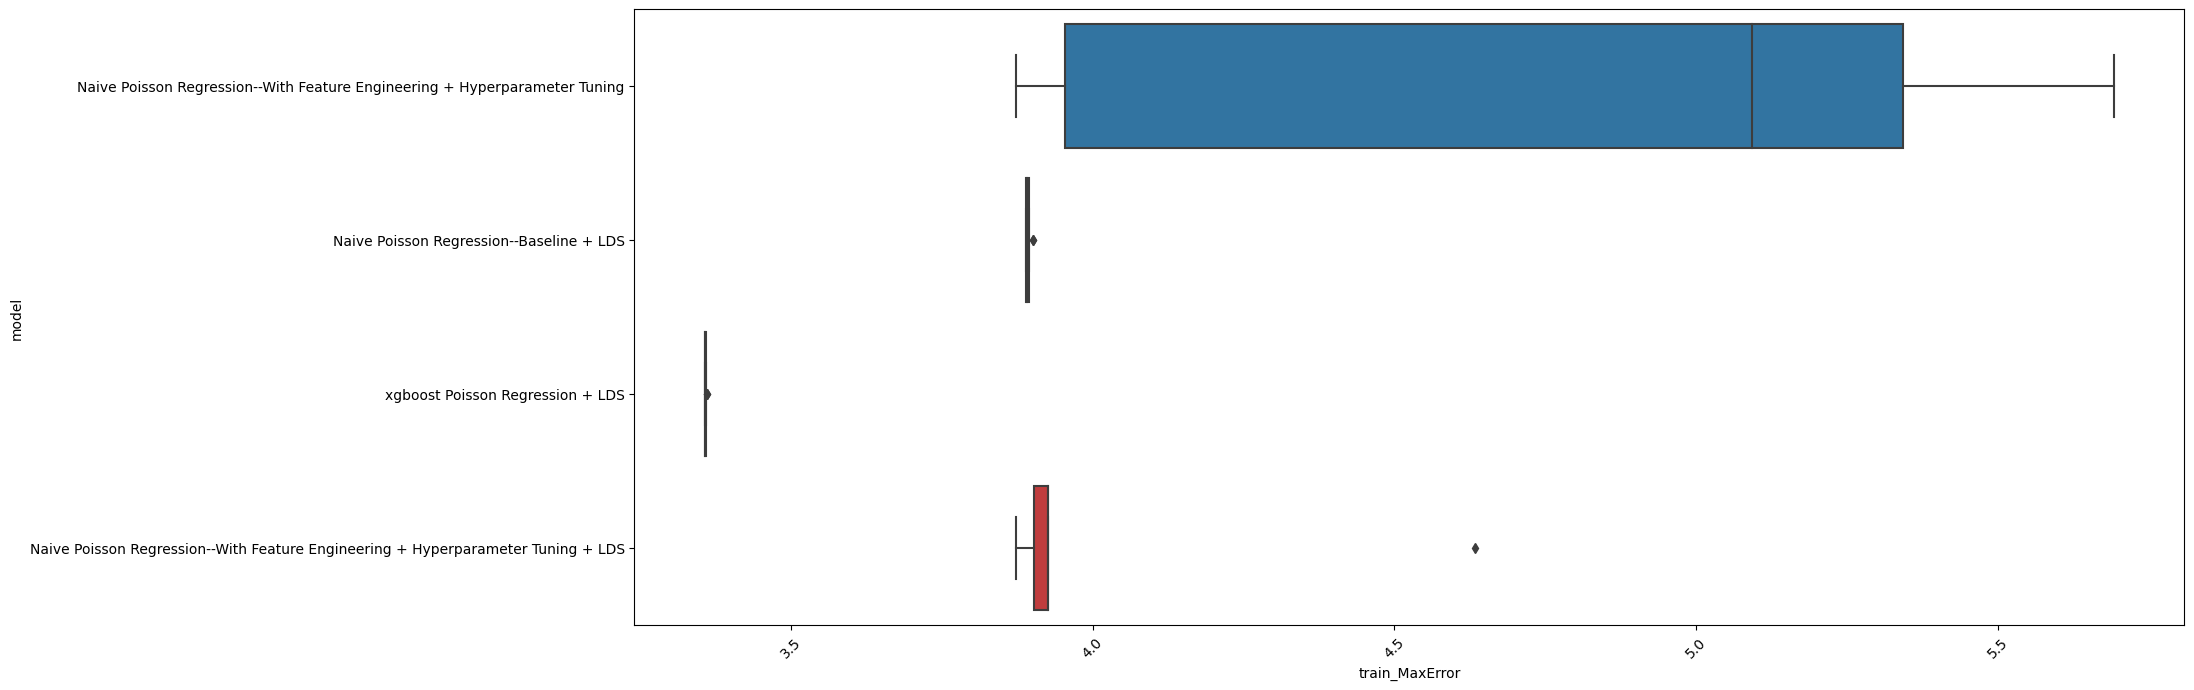

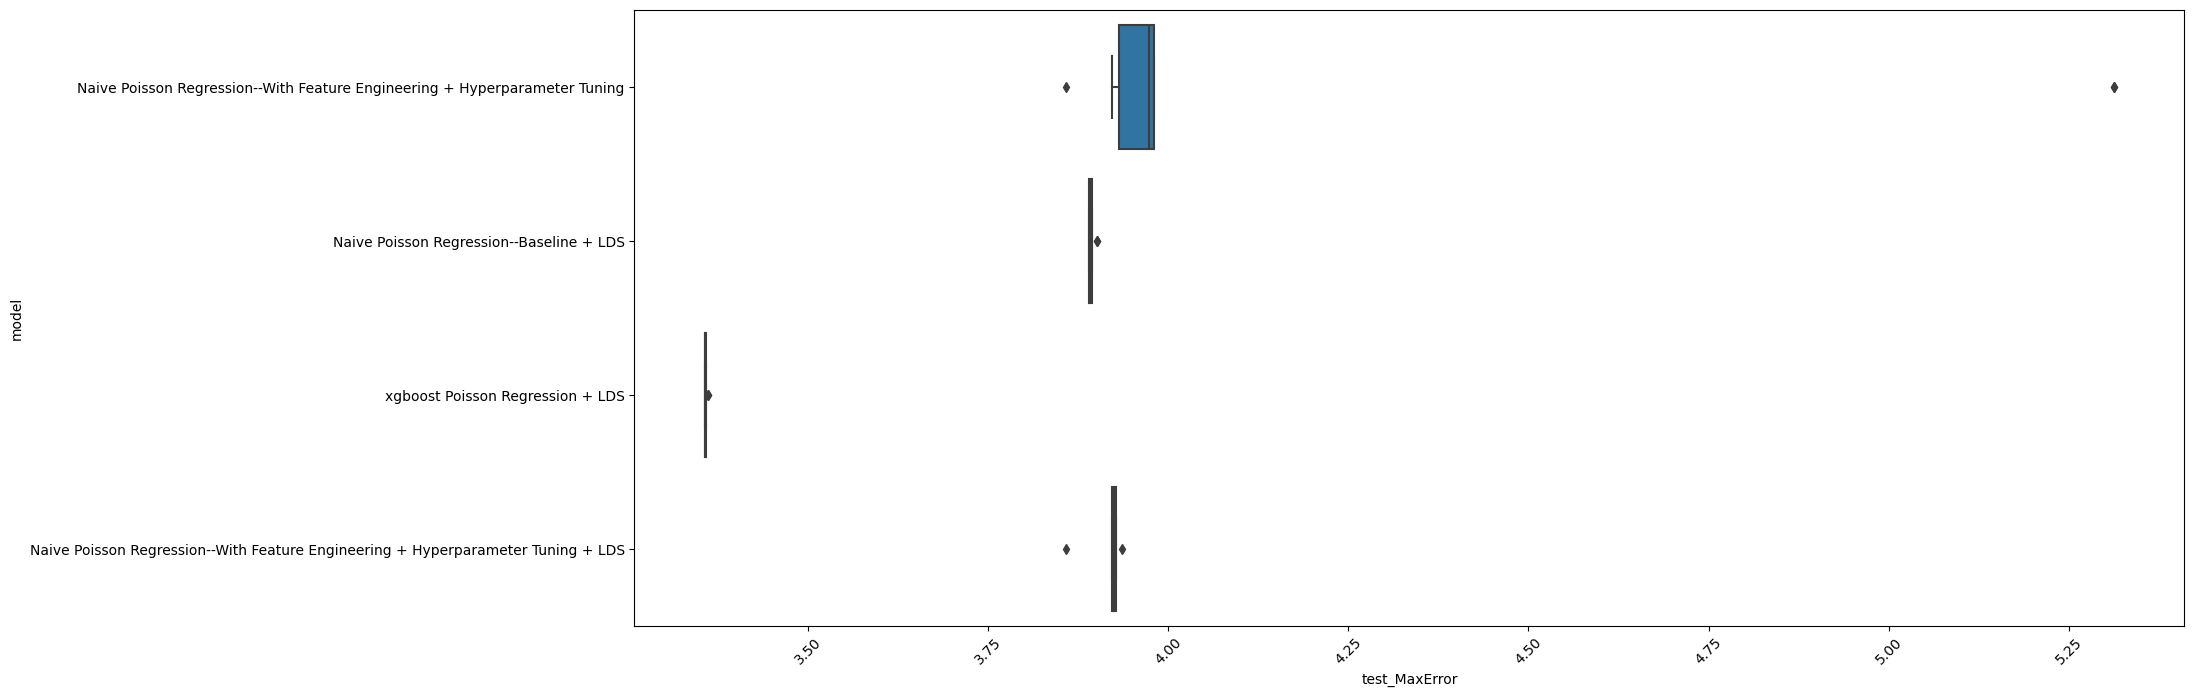

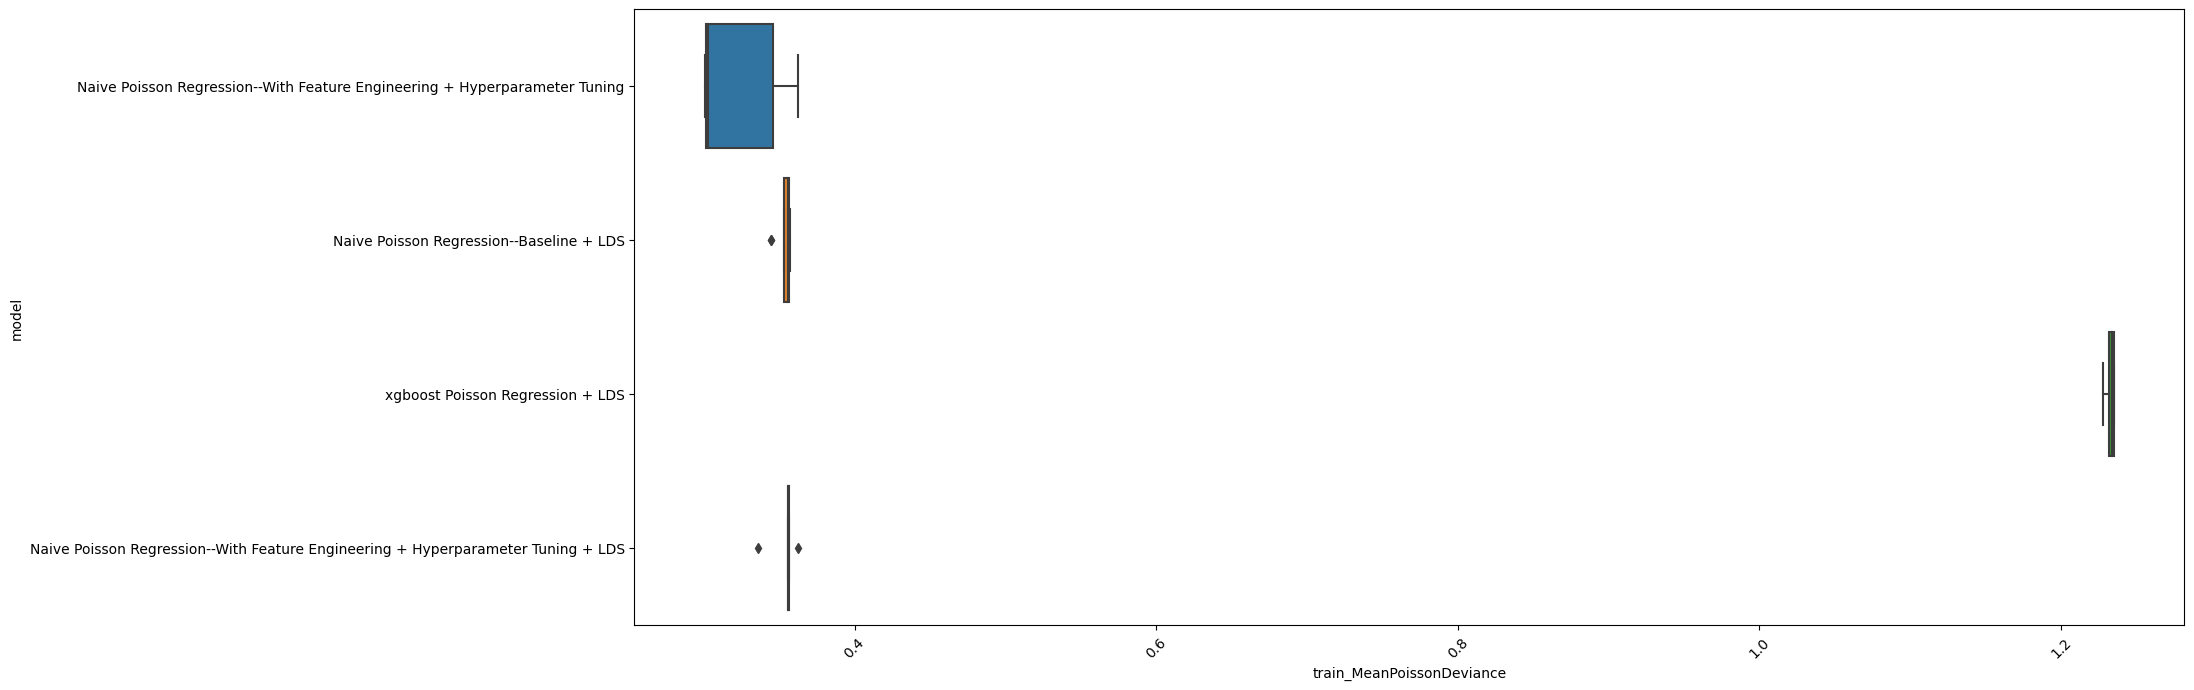

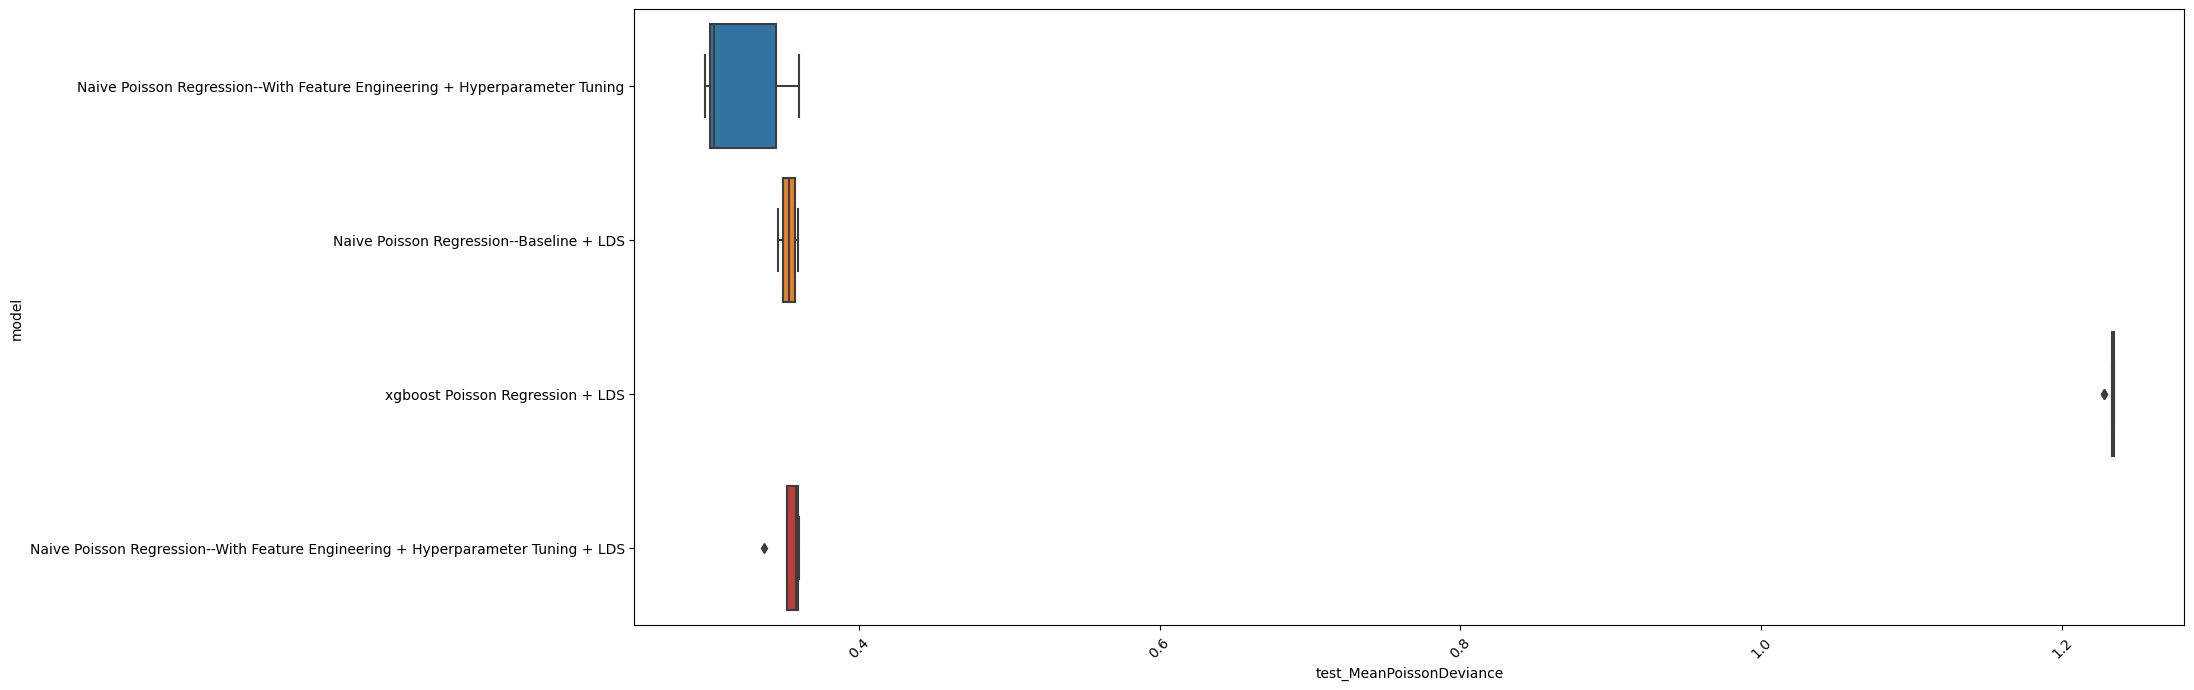

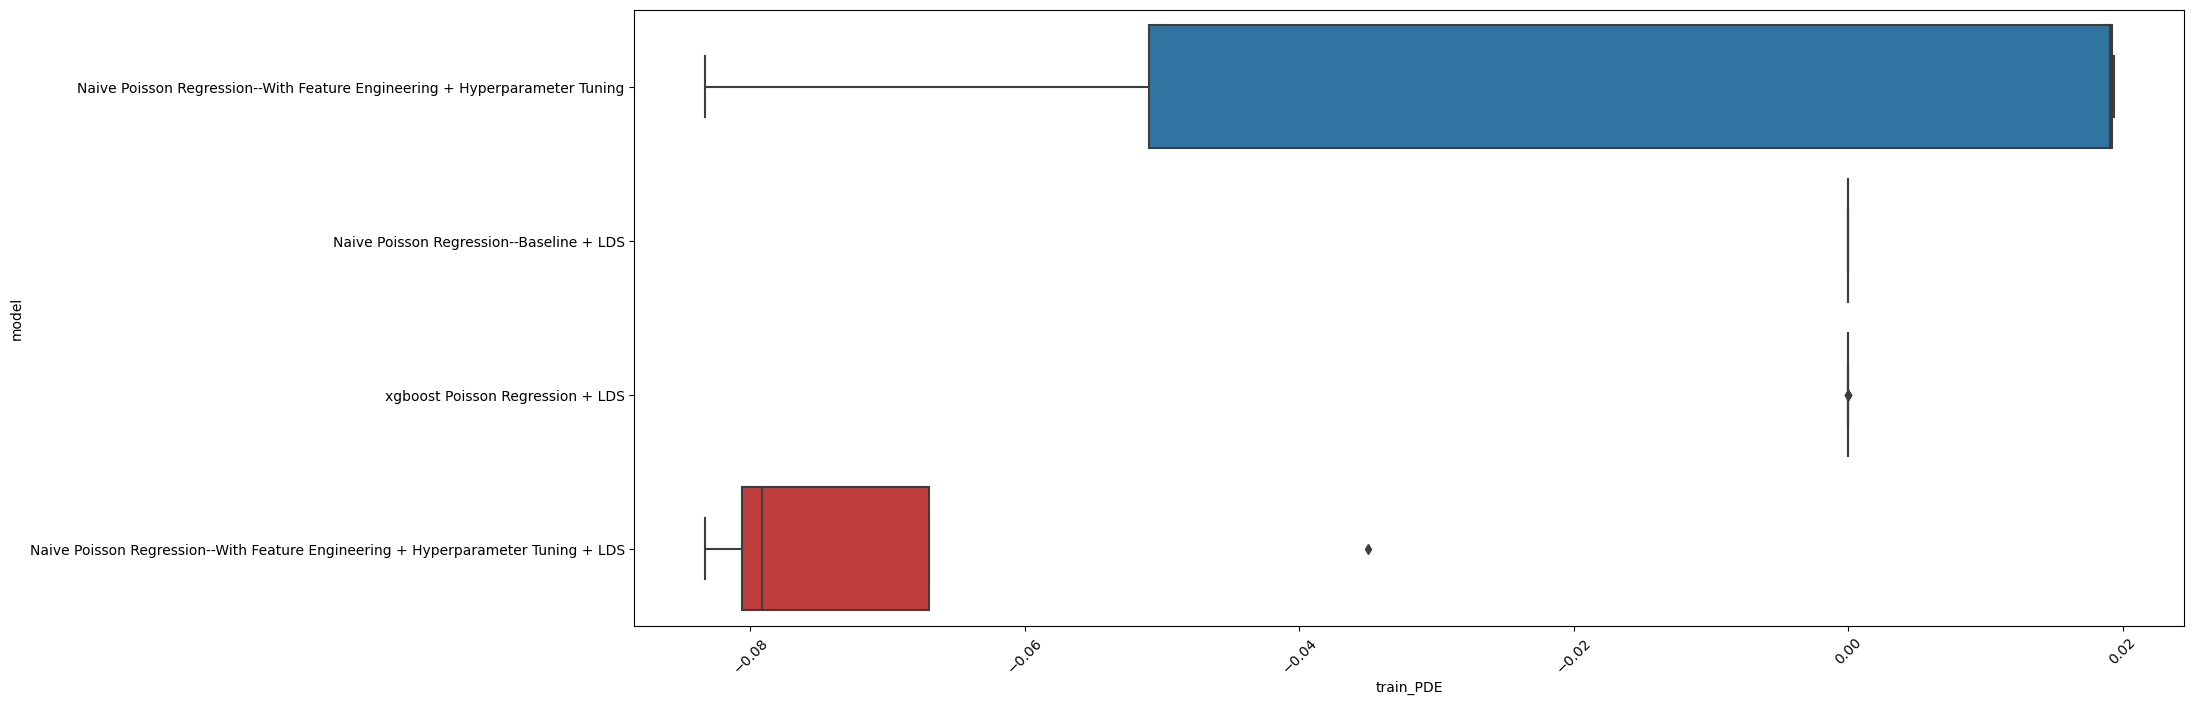

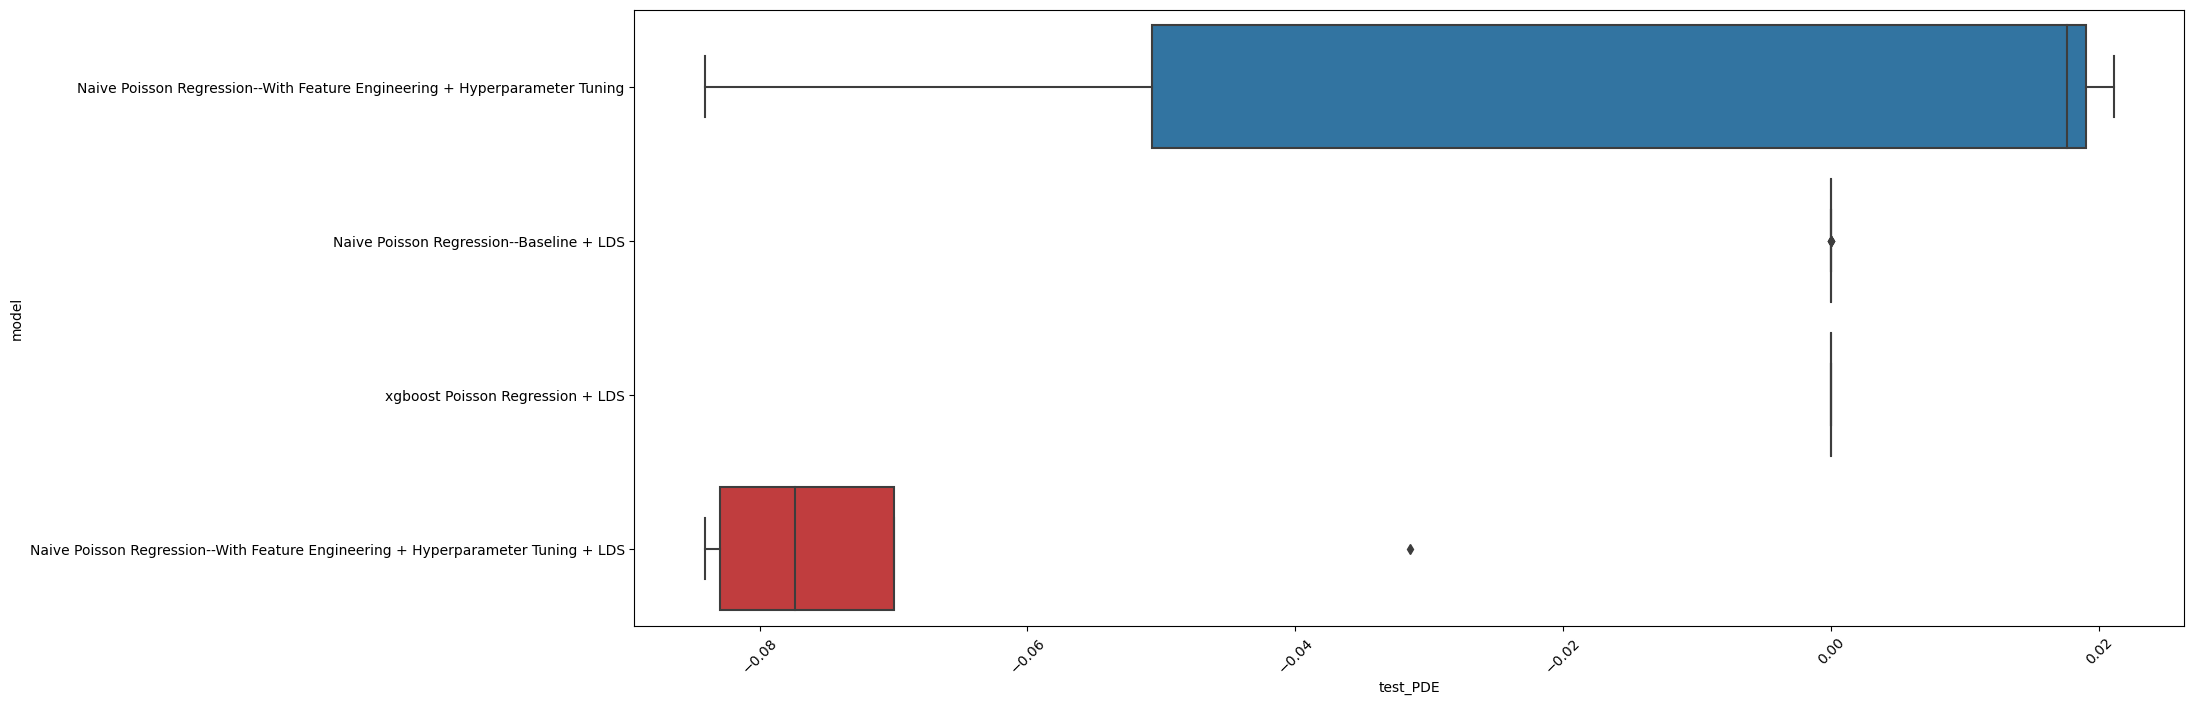

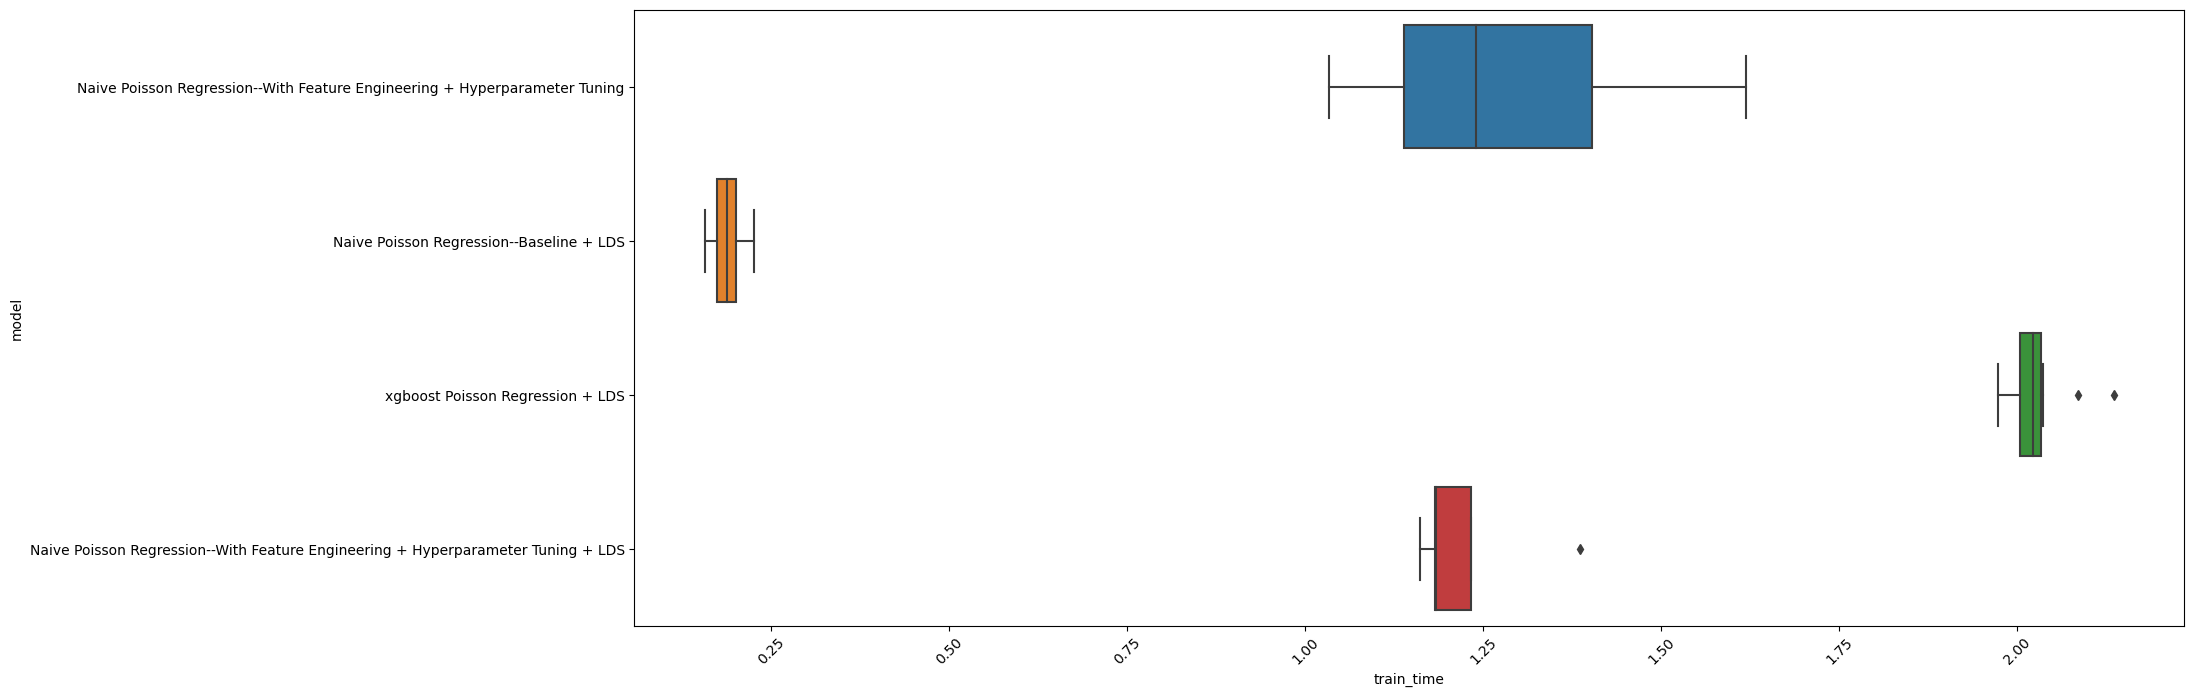

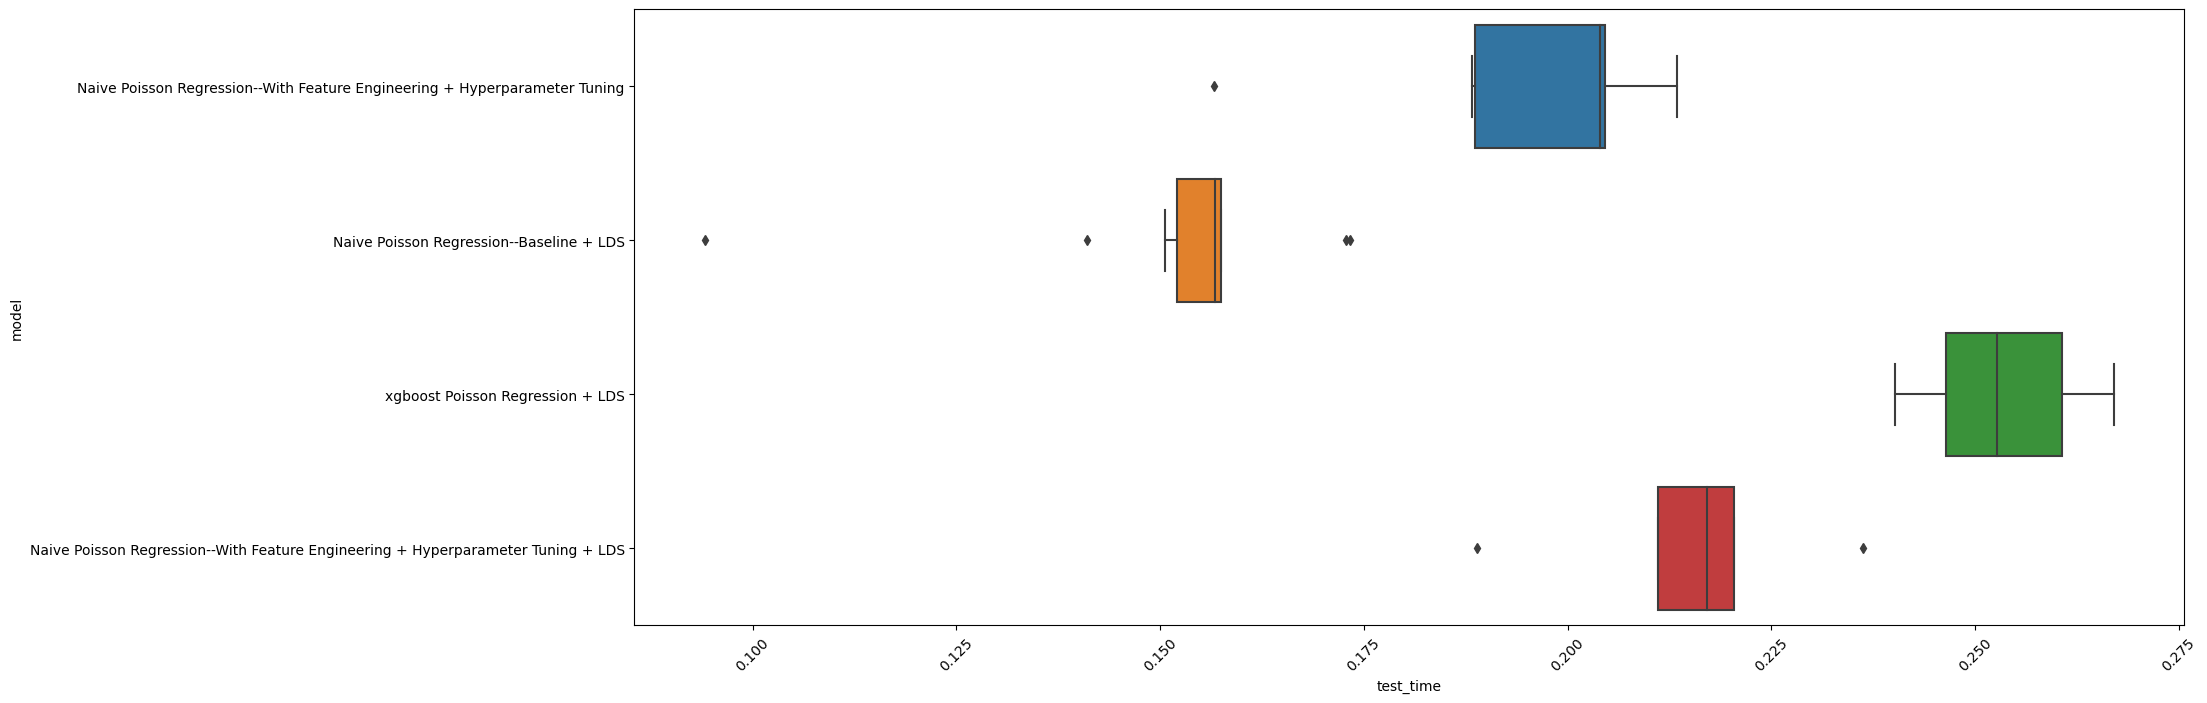

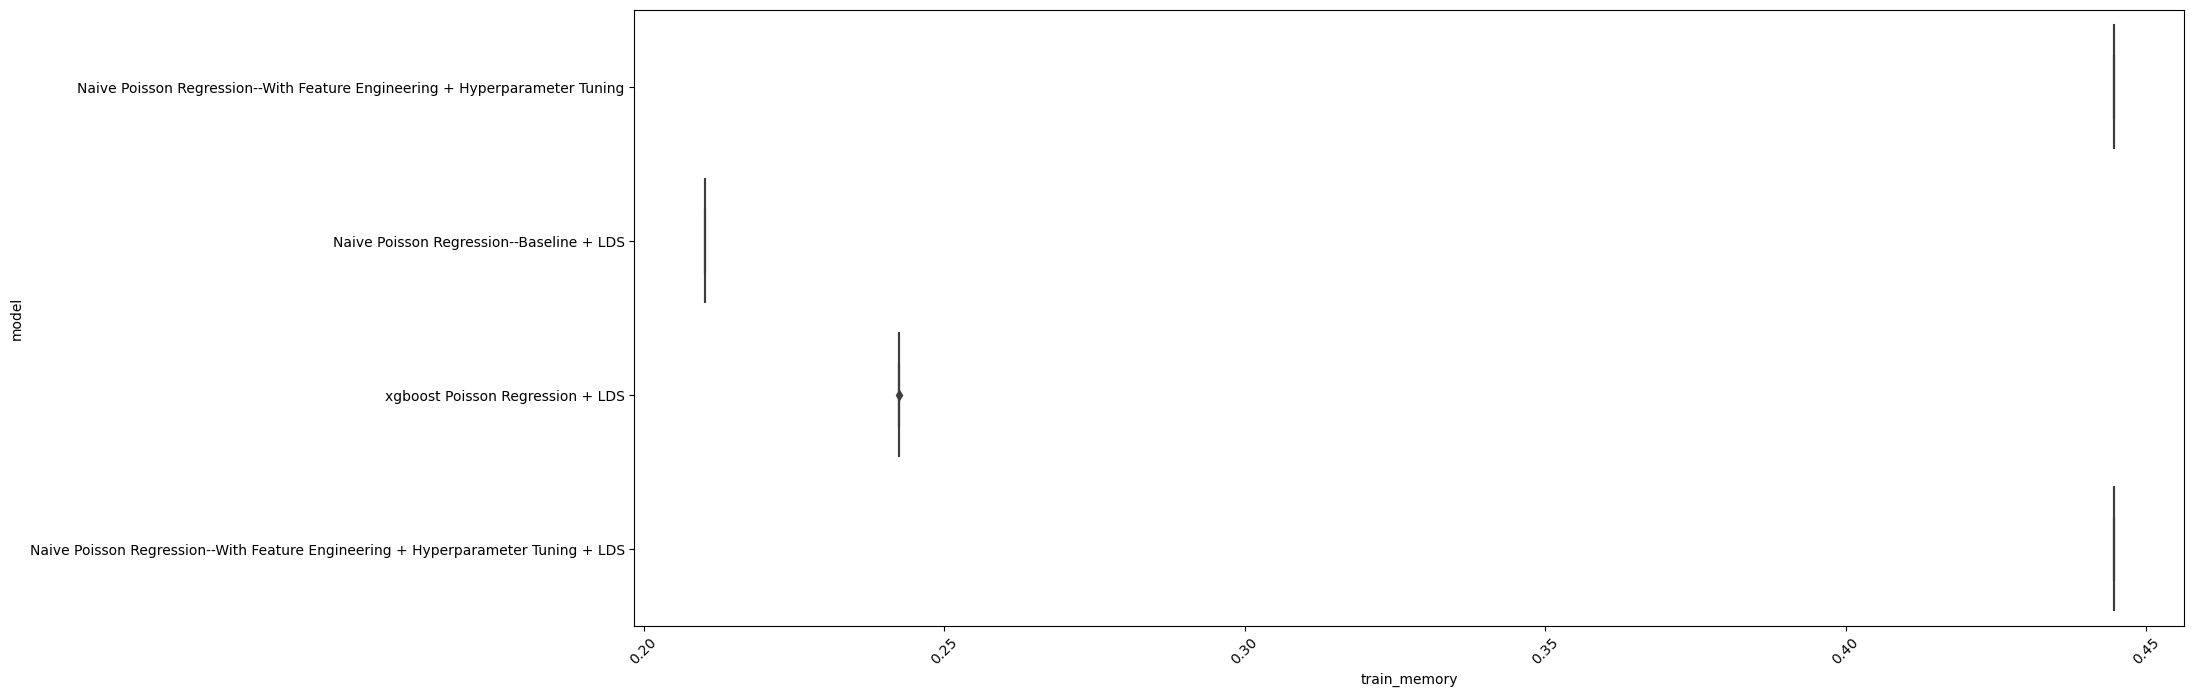

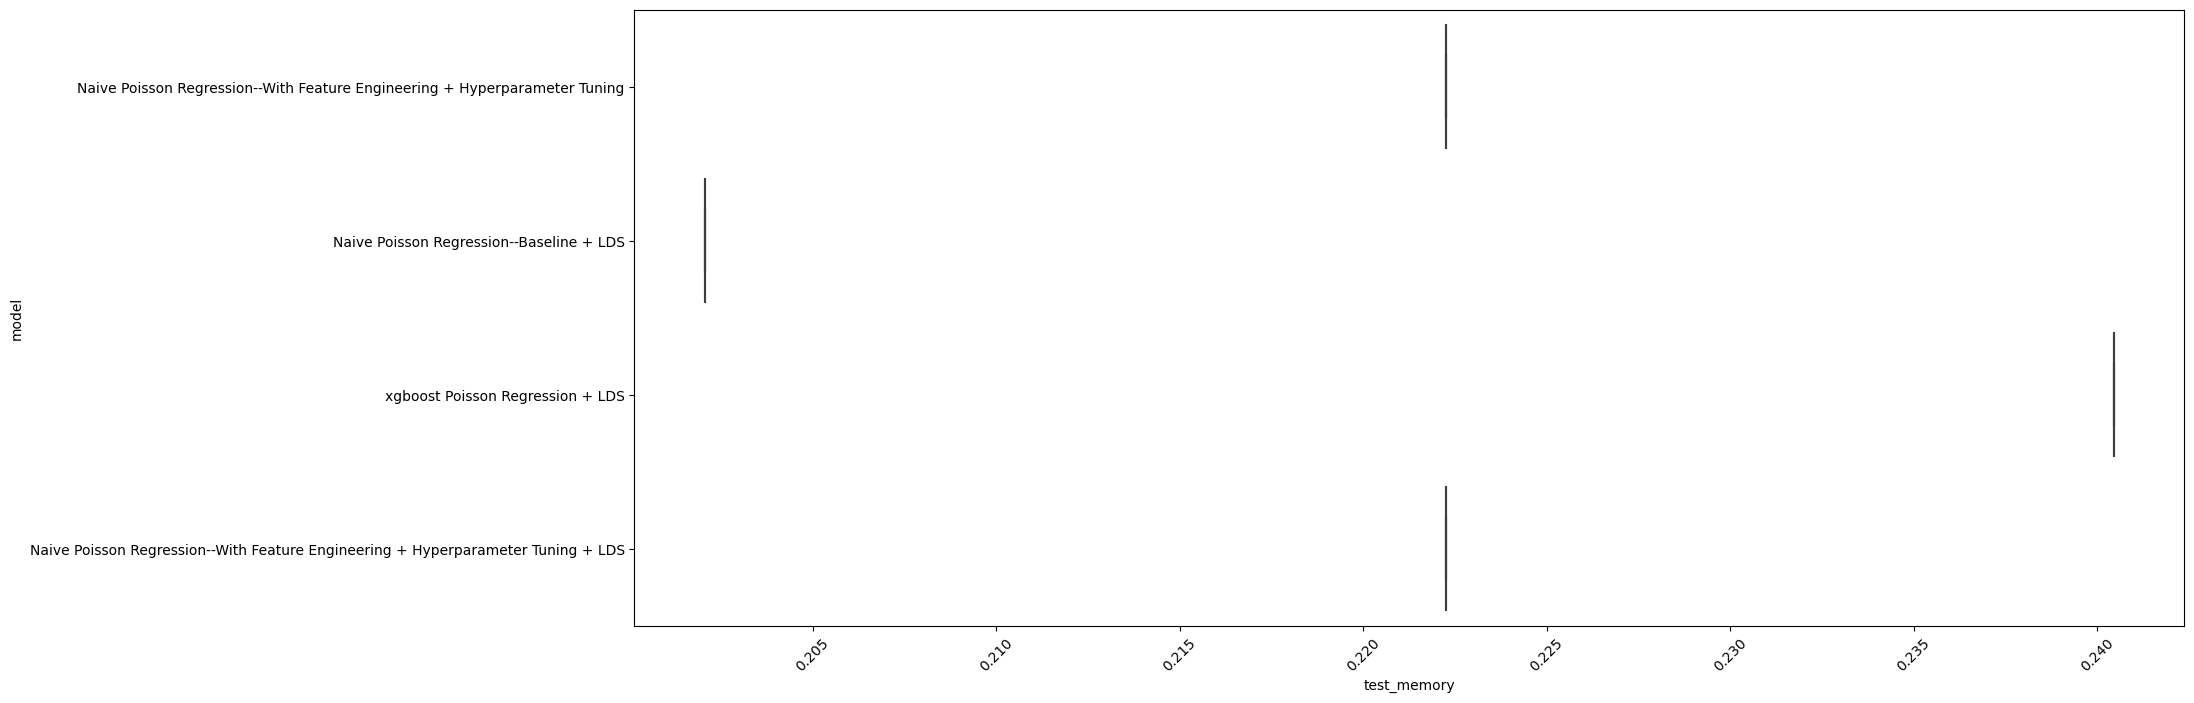

In [55]:
for metric in results[0].keys():
    if metric != "model":
        plt.figure(figsize=(20, len(results)))
        sns.boxplot(data=df_results, y="model", x=metric)
        plt.xticks(rotation=45)
        plt.show()